# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("Travel.csv")
df_selected = df
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
# df.drop('CustomerID', axis=1);

In [5]:
numeric_columns = [
    "Age",
    "DurationOfPitch",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "NumberOfTrips",
    "MonthlyIncome",
    "NumberOfChildrenVisiting",
    "PitchSatisfactionScore"
]

categorical_columns = [
    "ProdTaken",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
    "CityTier",
    "Passport",
    "OwnCar",
    "PreferredPropertyStar"
]

numeric_columns, categorical_columns

(['Age',
  'DurationOfPitch',
  'NumberOfPersonVisiting',
  'NumberOfFollowups',
  'NumberOfTrips',
  'MonthlyIncome',
  'NumberOfChildrenVisiting',
  'PitchSatisfactionScore'],
 ['ProdTaken',
  'TypeofContact',
  'Occupation',
  'Gender',
  'ProductPitched',
  'MaritalStatus',
  'Designation',
  'CityTier',
  'Passport',
  'OwnCar',
  'PreferredPropertyStar'])

# EDA

## 1. Descriptive Statistics

In [ ]:
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

*   Terdapat 8 kolom yang memiliki nilai null yaitu kolom Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome.
*   Tipe data pada setiap kolom sudah sesuai (kolom CityTier sudah diketahui sebelumnya bertipe data string namun diencode menjadi angka)


In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Diatas merupakan informasi jumlah nilai null pada setiap kolom. Nilai null terbanyak terdapat pada kolom DurationOfPitch dan yang paling sedikit terdapat pada kolom TypeOfContact.

**Next Action:** <br>
Kolom yang terdapat nilai null dapat didrop atau input data jika diperlukan.


In [ ]:
df[numeric_columns].describe()

Age  DurationOfPitch  NumberOfPersonVisiting  \
count  4662.000000      4637.000000             4888.000000   
mean     37.622265        15.490835                2.905074   
std       9.316387         8.519643                0.724891   
min      18.000000         5.000000                1.000000   
25%      31.000000         9.000000                2.000000   
50%      36.000000        13.000000                3.000000   
75%      44.000000        20.000000                3.000000   
max      61.000000       127.000000                5.000000   

       NumberOfFollowups  NumberOfTrips  MonthlyIncome  \
count        4843.000000    4748.000000    4655.000000   
mean            3.708445       3.236521   23619.853491   
std             1.002509       1.849019    5380.698361   
min             1.000000       1.000000    1000.000000   
25%             3.000000       2.000000   20346.000000   
50%             4.000000       3.000000   22347.000000   
75%             4.000000       4.000000   25571.000000   
max             6.000000      22.000000   98678.000000   

       NumberOfChildrenVisiting  PitchSatisfactionScore  
count               4822.000000             4888.000000  
mean                   1.187267                3.078151  
std                    0.857861                1.365792  
min                    0.000000                1.000000  
25%                    1.000000                2.000000  
50%                    1.000000                3.000000  
75%                    2.000000                4.000000  
max                    3.000000                5.000000

Dari nilai-nilai statistik diatas, dapat diketahui bahwa kolom 'DurationOfPitch', 'NumberOfTrips', dan 'MonthlyIncome' memiliki distribusi yang skew (terdapat outliers/nilai ekstrim).


*   **Age** : <br>
Selisih mean dan median yaitu sekitar 1.6 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **DurationOfPitch** : <br>
Selisih mean dan median yaitu sekitar 2.4 (agak besar) yang berarti distribusinya cenderung skew dan jika dilihat dari nilai max yang cukup jauh menandakan adanya outliers.
*   **NumberOfPersonVisiting** : <br>
Selisih mean dan median yaitu sekitar 0.1 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **NumberOfFollowups** : <br>
Selisih mean dan median yaitu sekitar 0.3 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **NumberOfTrips** : <br>
Selisih mean dan median yaitu sekitar 0.2 (kecil). Distribusinya cenderung skew karena terdapat outliers jika dilihat dari range median dan nilai max yang cukup jauh.
*   **PitchSatisfactionScore** : <br>
Selisih mean dan median yaitu sekitar 0.07 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **NumberOfChildrenVisiting** : <br>
Selisih mean dan median yaitu sekitar 0.1 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **MonthlyIncome** : <br>
Selisih mean dan median yaitu sekitar 1200 (besar) yang berarti distribusinya cenderung skew. Memiliki outliers karena nilai maxnya mencapai 98000 sementara nilai min 1000 dan median hanya 22000.

In [ ]:
df[['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'OwnCar']] = df[['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'OwnCar']].astype('category')

In [ ]:
df[categorical_columns].describe()

ProdTaken TypeofContact Occupation Gender ProductPitched  \
count        4888          4863       4888   4888           4888   
unique          2             2          4      3              5   
top             0  Self Enquiry   Salaried   Male          Basic   
freq         3968          3444       2368   2916           1842   

       MaritalStatus Designation  CityTier  Passport  OwnCar  \
count           4888        4888      4888      4888    4888   
unique             4           5         3         2       2   
top          Married   Executive         1         0       1   
freq            2340        1842      3190      3466    3032   

        PreferredPropertyStar  
count                  4862.0  
unique                    3.0  
top                       3.0  
freq                   2993.0

In [ ]:
print(df['Gender'].value_counts())

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


Terdapat value yang tidak sesuai pada kolom Gender yaitu 'Fe Male'. Karena pada umumnya gender memiliki 2 jenis yaitu Male dan Female. Dengan adanya value tersebut, maka akan kami anggap kesalahan input yang seharusnya 'Female'.

**Next Action:** <br>
Mengubah kolom yang bernilai 'Fe Male' menjadi 'Female'.

In [ ]:
print(df['MaritalStatus'].value_counts())

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


Nilai yang meragukan: 'Unmarried'. Tidak jelas apa perbedaan antara 'Unmarried' dan 'Single'/'Divorced'.

**Next Action:** <br>
Kolom yang bernilai 'Unmarried' akan diubah/gabungkan menjadi 'Single'.

## 2. Univariate Analysis

### Numeric columns

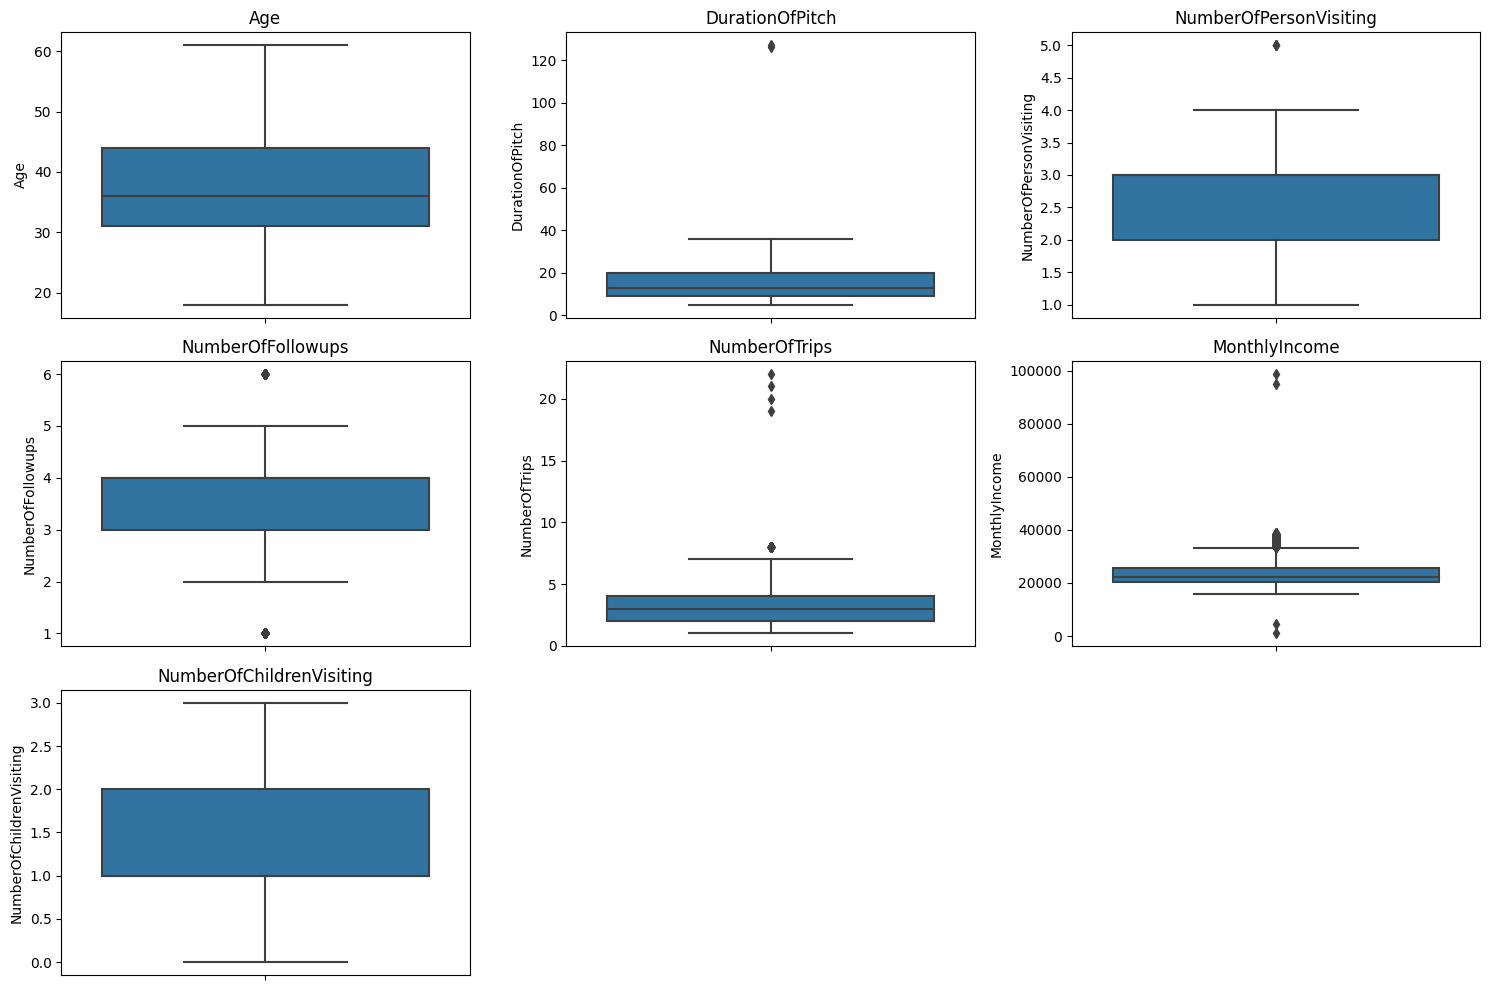

In [ ]:
plt.figure(figsize=(15, 10))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, index)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Age:

- Distribusi usia terlihat cukup simetris.

DurationOfPitch:

- Terdapat outlier yang jelas di ujung atas, menunjukkan bahwa ada beberapa pitch yang berlangsung jauh lebih lama dibandingkan yang lain.

NumberOfPersonVisiting:

- Sebagian besar data terkonsentrasi di angka 2 dan 3, dengan beberapa di angka 1 dan 4, dan sangat sedikit di angka 5.
- Tidak ada outlier yang jelas di sini.

NumberOfFollowups:

- Data tampaknya terpusat antara 3 dan 4 follow-up dengan beberapa di 6.

NumberOfTrips:

- Distribusi ini tampaknya sedikit miring ke kanan, dengan sejumlah besar pelanggan yang melakukan sedikit perjalanan.
- Ada beberapa outlier di ujung atas, menunjukkan ada pelanggan yang melakukan banyak perjalanan.

MonthlyIncome:

- Distribusi ini tampaknya miring ke kanan, dengan mayoritas pelanggan memiliki pendapatan bulanan di sisi yang lebih rendah.
- Ada beberapa outlier di ujung atas yang menunjukkan ada pelanggan dengan pendapatan yang sangat tinggi.
- Saat pra-pemrosesan, mungkin kita ingin mempertimbangkan normalisasi atau transformasi kolom ini untuk mendapatkan distribusi yang lebih simetris.

NumberOfChildrenVisiting:

- Sebagian besar data terpusat pada 1 hingga 2, dengan sejumlah kecil pada 3.
- Tidak ada outlier yang jelas di sini.

Kesimpulan dan Rekomendasi Pra-pemrosesan:

- Kolom DurationOfPitch dan MonthlyIncome mungkin memerlukan transformasi (seperti log transform) untuk mendekatinya dengan distribusi normal, terutama jika kita berencana menggunakan algoritma yang sensitif terhadap distribusi data.


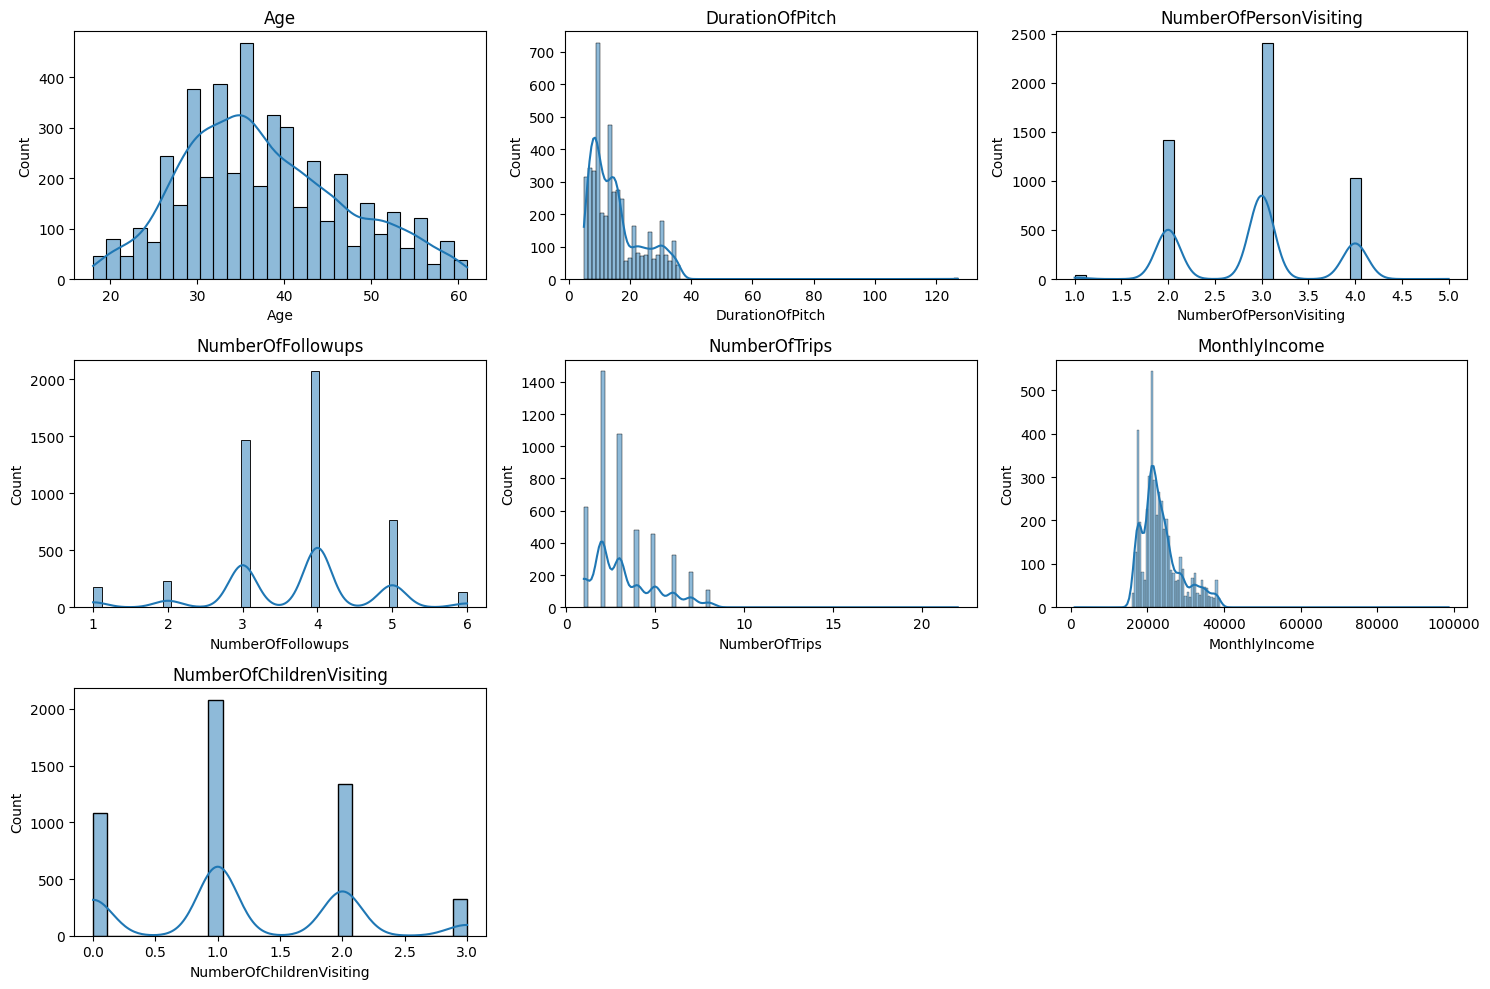

In [ ]:
plt.figure(figsize=(15, 10))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, index)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

Age:

- Distribusi usia tampak simetris dengan puncak di sekitar usia 30-an.
- Ada sedikit kecenderungan untuk memiliki lebih banyak pelanggan di kelompok usia 20-40 tahun.
- Tidak ada bukti kuat dari distribusi yang sangat miring.

DurationOfPitch:

- Distribusi durasi pitch tampaknya sangat miring ke kanan, dengan sebagian besar pitch berlangsung antara 5 hingga 20 menit.
- Ada puncak kecil di sekitar 10 menit, yang mungkin menunjukkan durasi pitch standar.
- Ada beberapa nilai yang lebih tinggi yang menunjukkan durasi pitch yang lebih lama, yang perlu ditelusuri lebih lanjut.

NumberOfPersonVisiting:

- Mayoritas pelanggan mengunjungi dengan 2 atau 3 orang.
- Tidak ada bukti kuat dari distribusi yang sangat miring.

NumberOfFollowups:

- Mayoritas data berpusat di sekitar 3-4 follow-up.

NumberOfTrips:

- Distribusi ini tampaknya sedikit miring ke kanan, dengan mayoritas pelanggan melakukan 1-4 perjalanan.
- Ada beberapa nilai yang lebih tinggi yang menunjukkan jumlah perjalanan yang lebih tinggi, mungkin menunjukkan pelanggan yang sering bepergian.

MonthlyIncome:

- Distribusi ini sangat miring ke kanan, dengan sebagian besar pelanggan memiliki pendapatan bulanan di sisi yang lebih rendah.
- Ada beberapa nilai yang sangat tinggi yang menunjukkan pendapatan yang lebih tinggi, mungkin menunjukkan segmen pelanggan berpendapatan tinggi.

NumberOfChildrenVisiting:

- Sebagian besar pelanggan mengunjungi dengan 0 atau 1 anak.
- Ada kecenderungan untuk memiliki lebih sedikit pelanggan yang mengunjungi dengan 2 atau lebih anak.

Kesimpulan dan Rekomendasi Pra-pemrosesan:

- Kolom seperti DurationOfPitch dan MonthlyIncome yang memiliki distribusi yang sangat miring mungkin memerlukan transformasi (seperti log transform) untuk mendekatinya dengan distribusi normal.

- Kolom dengan variasi yang rendah atau dengan sebagian besar data yang terkonsentrasi di sekitar satu nilai mungkin kurang informatif untuk analisis tertentu. Namun, sebelum memutuskan untuk mengabaikannya, kita harus memahami konteks bisnis dan pentingnya variabel tersebut.

- Sebagai langkah awal, kita mungkin juga ingin menangani nilai yang hilang di beberapa kolom dengan strategi yang sesuai.

### Categorical columns

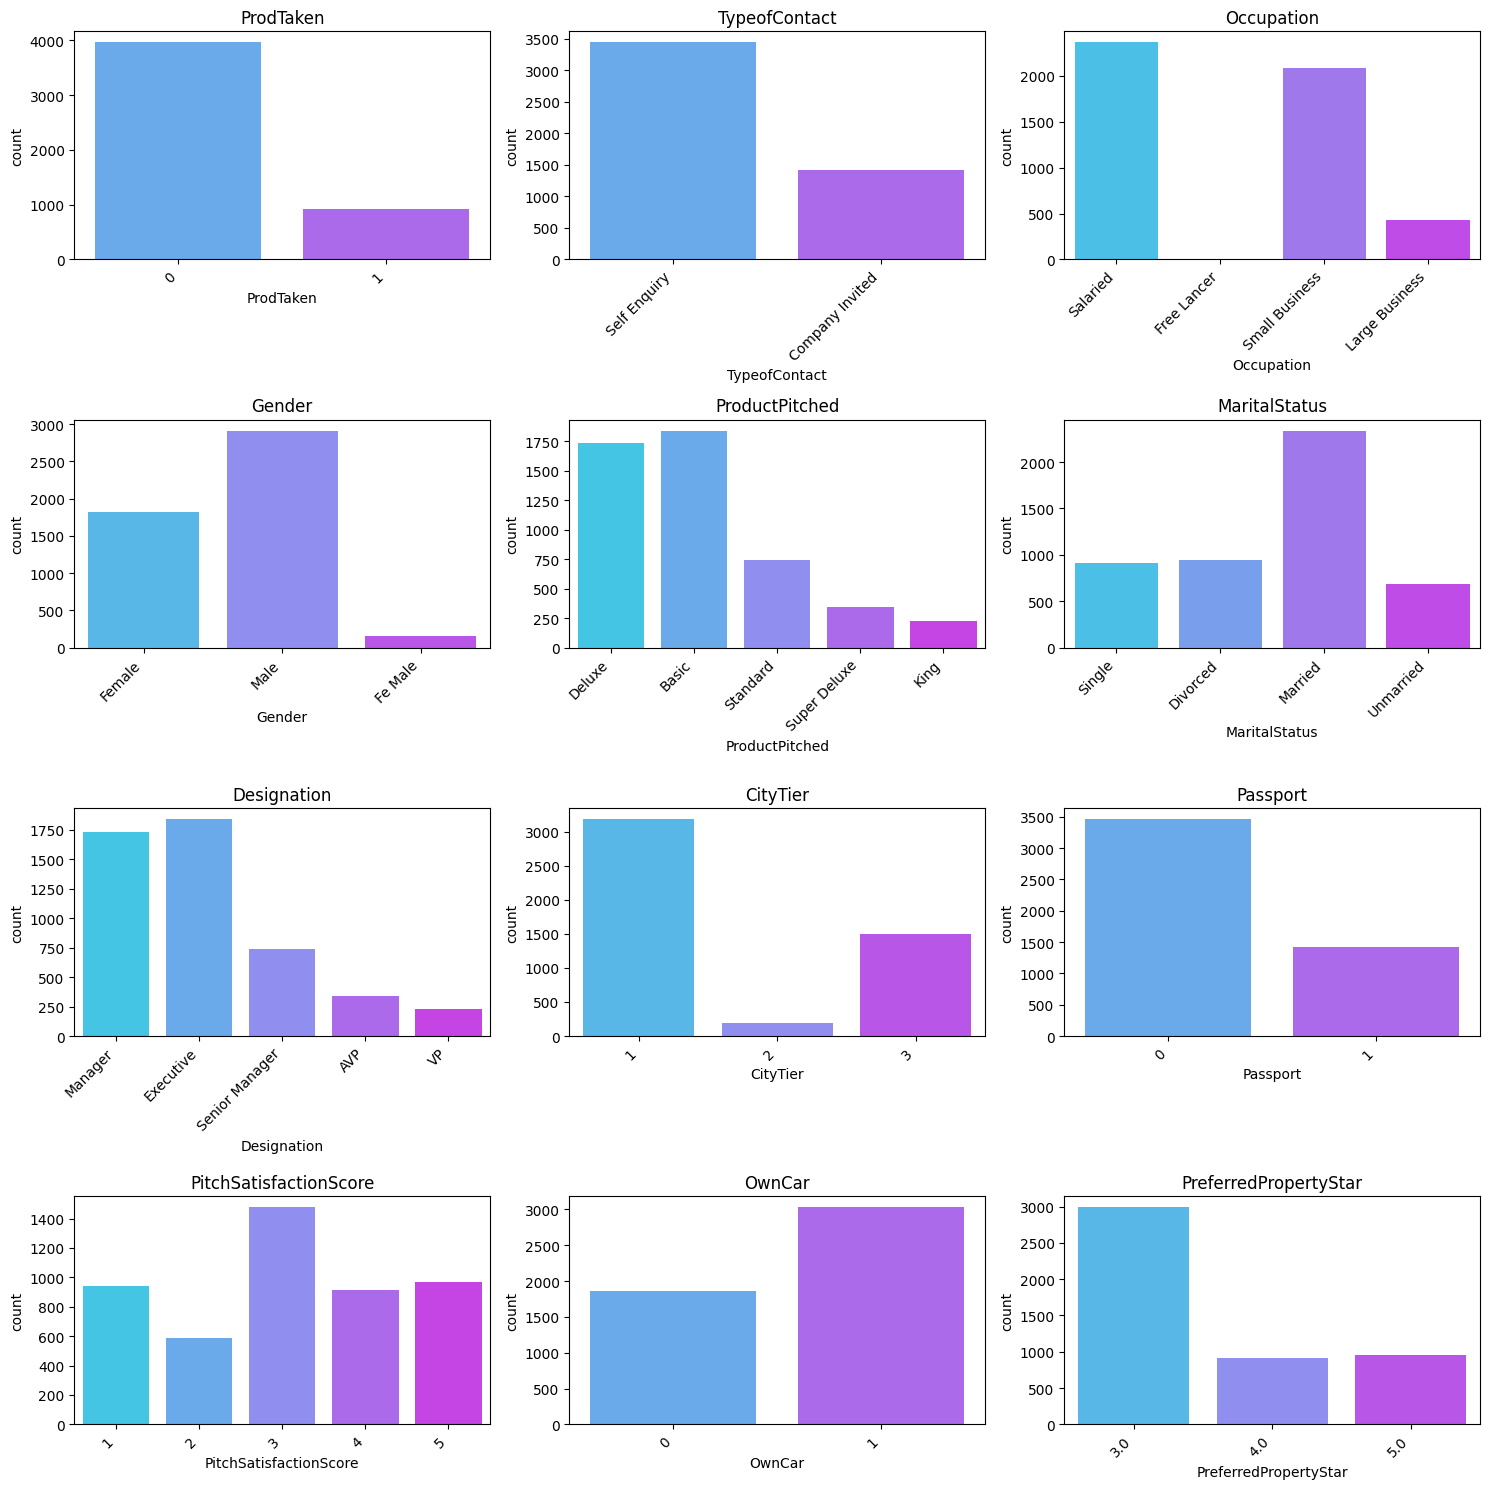

In [ ]:
plt.figure(figsize=(15, 15))

for index, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, index)
    sns.countplot(data=df, x=column, palette="cool")
    plt.title(column)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

ProdTaken:

- Mayoritas pelanggan tampaknya tidak mengambil produk.
- Distribusi ini sangat miring ke salah satu kategori, menunjukkan ketidakseimbangan dalam data.

TypeofContact:

- Sebagian besar pelanggan dikontak melalui jenis kontak "Self Enquiry".

Occupation:

- Mayoritas pelanggan memiliki pekerjaan sebagai "Salaried", diikuti oleh "Small Business" dan "Large Business".
- Sangat sedikit pelanggan yang dikategorikan sebagai "Free Lancer".

Gender:

- Mayoritas pelanggan adalah laki-laki, diikuti oleh perempuan.
- Ada kategori ketiga, "Fe Male", yang tampaknya adalah kesalahan entri data. Ini harus ditangani saat pra-pemrosesan karena "Fe Male" kemungkinan besar seharusnya "Female".

ProductPitched:

- Produk yang paling sering dipitch adalah "Basic", diikuti oleh "Deluxe", "Standard", "Super Deluxe", dan "King".

MaritalStatus:

- Sebagian besar pelanggan adalah "Married", diikuti oleh "Divorced", "Single", dan "Unmarried".

Designation:

- Sebagian besar pelanggan memiliki desain "Executive", diikuti oleh "Manager" dan "Senior Manager".
- Sangat sedikit pelanggan yang memiliki desain "VP".

CityTier:

- Mayoritas pelanggan berasal dari "City Tier 1", diikuti oleh "City Tier 2" dan "City Tier 3".

Passport:

- Mayoritas pelanggan tampaknya tidak memiliki paspor.

PitchSatisfactionScore:

- Distribusi skor kepuasan tampaknya cukup seimbang, dengan semua kategori memiliki jumlah pelanggan yang serupa.

OwnCar:

- Sebagian besar pelanggan memiliki mobil.

PreferredPropertyStar:
- Sebagian besar pelanggan lebih memilih properti bintang 3, diikuti oleh bintang 4 dan 5.


### **Rekomendasi Pra-pemrosesan**

Keseimbangan Kelas Target (ProdTaken):

- Kolom target ProdTaken menunjukkan ketidakseimbangan kelas, di mana mayoritas pelanggan tidak mengambil produk.
- Teknik penyeimbangan seperti oversampling kelas minoritas atau undersampling kelas mayoritas dapat dipertimbangkan saat mempersiapkan data untuk pemodelan.
- Teknik sintetis seperti SMOTE (Synthetic Minority Over-sampling Technique) juga bisa menjadi pilihan untuk menangani ketidakseimbangan kelas.

Koreksi Kesalahan Entri Data:

- Di kolom Gender, "Fe Male" seharusnya dikoreksi menjadi "Female". Kesalahan entri seperti ini dapat mempengaruhi kualitas model dan harus diperbaiki.

Transformasi Variabel Miring:

- Kolom seperti DurationOfPitch dan MonthlyIncome memiliki distribusi yang miring dan mungkin memerlukan transformasi, seperti log transform, untuk mendekatinya dengan distribusi yang lebih normal.
- Transformasi ini akan membantu dalam mempersiapkan data untuk model yang memerlukan asumsi distribusi normal.

Pengkodean Variabel Kategorik:

- Variabel kategorik seperti TypeofContact, Occupation, Gender, dll., perlu dikodekan sebelum digunakan dalam pemodelan. Teknik seperti one-hot encoding atau label encoding dapat digunakan tergantung pada jenis model yang akan digunakan.

Penanganan Outliers:

- Kolom seperti DurationOfPitch memiliki outlier yang mungkin mempengaruhi performa model. Outlier ini dapat dihapus, dikap atau digantikan dengan nilai lain seperti median atau mean.

Normalisasi atau Penskalaan:

- Variabel numerik dengan skala yang berbeda mungkin perlu dinormalkan atau diskalakan, terutama jika kita berencana menggunakan algoritma yang sensitif terhadap skala seperti SVM atau k-NN.

## 3. Multivariate Analysis

### a. Korelasi Fitur-Label

In [ ]:
# Load Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv("Travel.csv")

# Memisahkan kolom numerik
numeric_columns = data[[
    "ProdTaken",
    "Age",
    "DurationOfPitch",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "NumberOfTrips",
    "MonthlyIncome",
    "NumberOfChildrenVisiting",
    "PitchSatisfactionScore"
]]

# Korelasi
numeric_columns.corr()

ProdTaken       Age  DurationOfPitch  \
ProdTaken                  1.000000 -0.147254         0.078257   
Age                       -0.147254  1.000000        -0.012063   
DurationOfPitch            0.078257 -0.012063         1.000000   
NumberOfPersonVisiting     0.009627  0.011621         0.065141   
NumberOfFollowups          0.112171 -0.002577         0.009434   
NumberOfTrips              0.018898  0.184905         0.009715   
MonthlyIncome             -0.130585  0.464869        -0.006252   
NumberOfChildrenVisiting   0.007421  0.007370         0.031408   
PitchSatisfactionScore     0.051394  0.018510        -0.002880   

                          NumberOfPersonVisiting  NumberOfFollowups  \
ProdTaken                               0.009627           0.112171   
Age                                     0.011621          -0.002577   
DurationOfPitch                         0.065141           0.009434   
NumberOfPersonVisiting                  1.000000           0.328569   
NumberOfFollowups                       0.328569           1.000000   
NumberOfTrips                           0.195223           0.139517   
MonthlyIncome                           0.195134           0.176503   
NumberOfChildrenVisiting                0.610621           0.286425   
PitchSatisfactionScore                 -0.019581           0.004054   

                          NumberOfTrips  MonthlyIncome  \
ProdTaken                      0.018898      -0.130585   
Age                            0.184905       0.464869   
DurationOfPitch                0.009715      -0.006252   
NumberOfPersonVisiting         0.195223       0.195134   
NumberOfFollowups              0.139517       0.176503   
NumberOfTrips                  1.000000       0.139105   
MonthlyIncome                  0.139105       1.000000   
NumberOfChildrenVisiting       0.168795       0.201643   
PitchSatisfactionScore        -0.004378       0.030421   

                          NumberOfChildrenVisiting  PitchSatisfactionScore  
ProdTaken                                 0.007421                0.051394  
Age                                       0.007370                0.018510  
DurationOfPitch                           0.031408               -0.002880  
NumberOfPersonVisiting                    0.610621               -0.019581  
NumberOfFollowups                         0.286425                0.004054  
NumberOfTrips                             0.168795               -0.004378  
MonthlyIncome                             0.201643                0.030421  
NumberOfChildrenVisiting                  1.000000                0.000878  
PitchSatisfactionScore                    0.000878                1.000000

<Axes: >

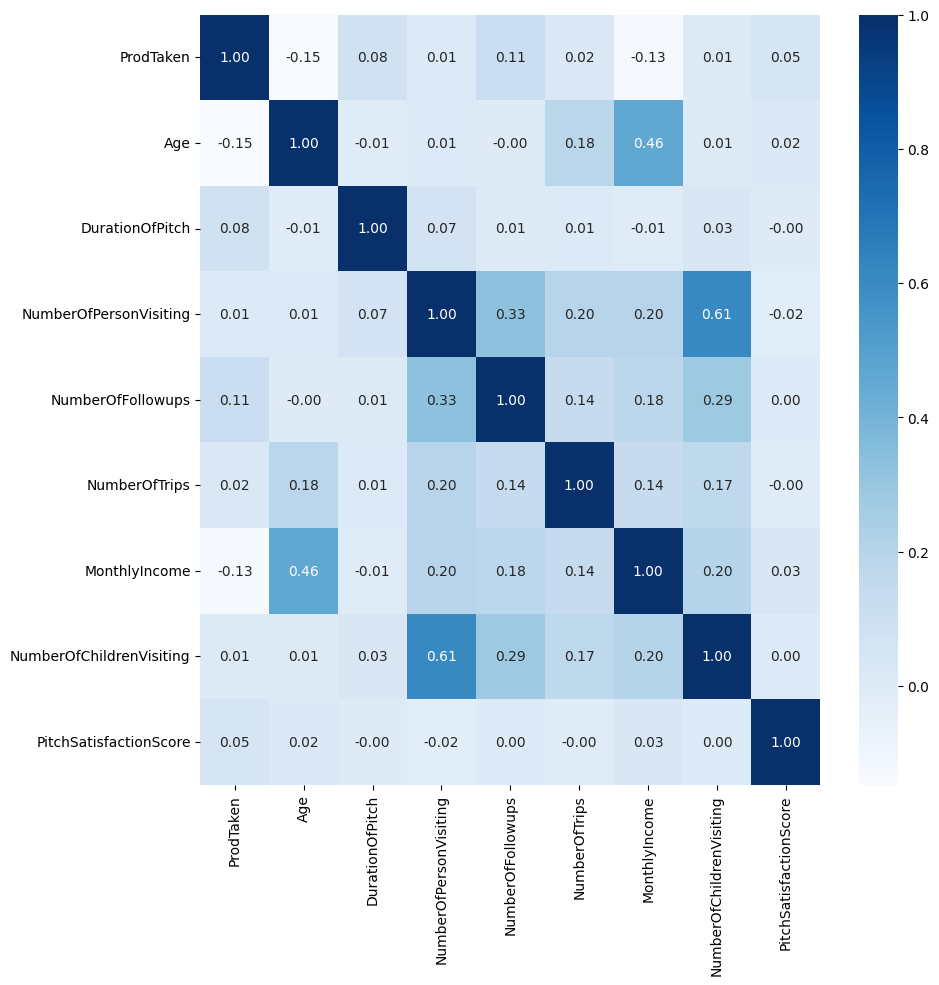

In [ ]:
# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_columns.corr(), cmap='Blues', annot=True, fmt='.2f')

**1. Age (Usia) vs. ProdTaken:** <br>
Korelasi: -0.147254 ~ -0.15 <br>
Interpretasi: Terdapat korelasi negatif yang lemah antara usia dan keputusan untuk membeli produk ("ProdTaken"). Ini bisa berarti bahwa orang yang lebih muda mungkin lebih cenderung membeli produk daripada orang yang lebih tua. <br>
**2. DurationOfPitch (Durasi Presentasi) vs. ProdTaken:** <br>
Korelasi: 0.078257 ~ 0.08<br>
Interpretasi: Terdapat korelasi positif yang lemah antara durasi presentasi dan keputusan untuk membeli produk. Ini mungkin berarti bahwa presentasi yang lebih lama dapat meningkatkan kemungkinan seseorang untuk membeli produk. <br>
**3. NumberOfPersonVisiting (Jumlah Orang yang Berkunjung) vs. ProdTaken:** <br>
Korelasi: 0.009627 ~ 0.01 <br>
Interpretasi: Korelasi ini sangat lemah, sehingga tidak ada hubungan yang signifikan antara jumlah orang yang berkunjung dan keputusan untuk membeli produk. <br>
**4. NumberOfFollowups vs. ProdTaken:** <br>
Korelasi: 0.112171 ~ 0.11 <br>
Interpretasi: Terdapat korelasi positif yang lemah antara jumlah tindak lanjut yang dilakukan dan keputusan untuk membeli produk. Ini mungkin menunjukkan bahwa lebih banyak tindak lanjut dapat meningkatkan kemungkinan seseorang untuk membeli produk. <br>
**5. NumberOfTrips vs. ProdTaken:** <br>
Korelasi: 0.018898 ~ 0.02 <br>
Interpretasi: Terdapat korelasi positif yang lemah antara jumlah perjalanan yang dilakukan dan keputusan untuk membeli produk. Ini bisa berarti bahwa orang yang sering bepergian cenderung lebih cenderung membeli produk. <br>

**6. MonthlyIncome (Pendapatan Bulanan) vs. ProdTaken:** <br>
Korelasi: -0.130585 ~ -0.13 <br>
Interpretasi: Terdapat korelasi negatif yang sedang antara pendapatan bulanan dan keputusan untuk membeli produk. Ini bisa berarti bahwa orang dengan pendapatan yang lebih rendah cenderung lebih cenderung membeli produk.<br>

**7. NumberOfChildrenVisiting vs. ProdTaken:** <br>
Korelasi: 0.007421 ~ 0.01 <br>
Interpretasi: Korelasi ini sangat lemah, sehingga tidak ada hubungan yang signifikan antara jumlah anak yang berkunjung dan keputusan untuk membeli produk. <br>

**8. PitchSatisfactionScore vs. ProdTaken:** <br>
Korelasi: 0.051394 ~ 0.05 <br>
Interpretasi: Terdapat korelasi positif yang lemah antara skor kepuasan presentasi dan keputusan untuk membeli produk. Ini menunjukkan bahwa pelanggan yang lebih puas dengan presentasi cenderung lebih cenderung membeli produk. <br>




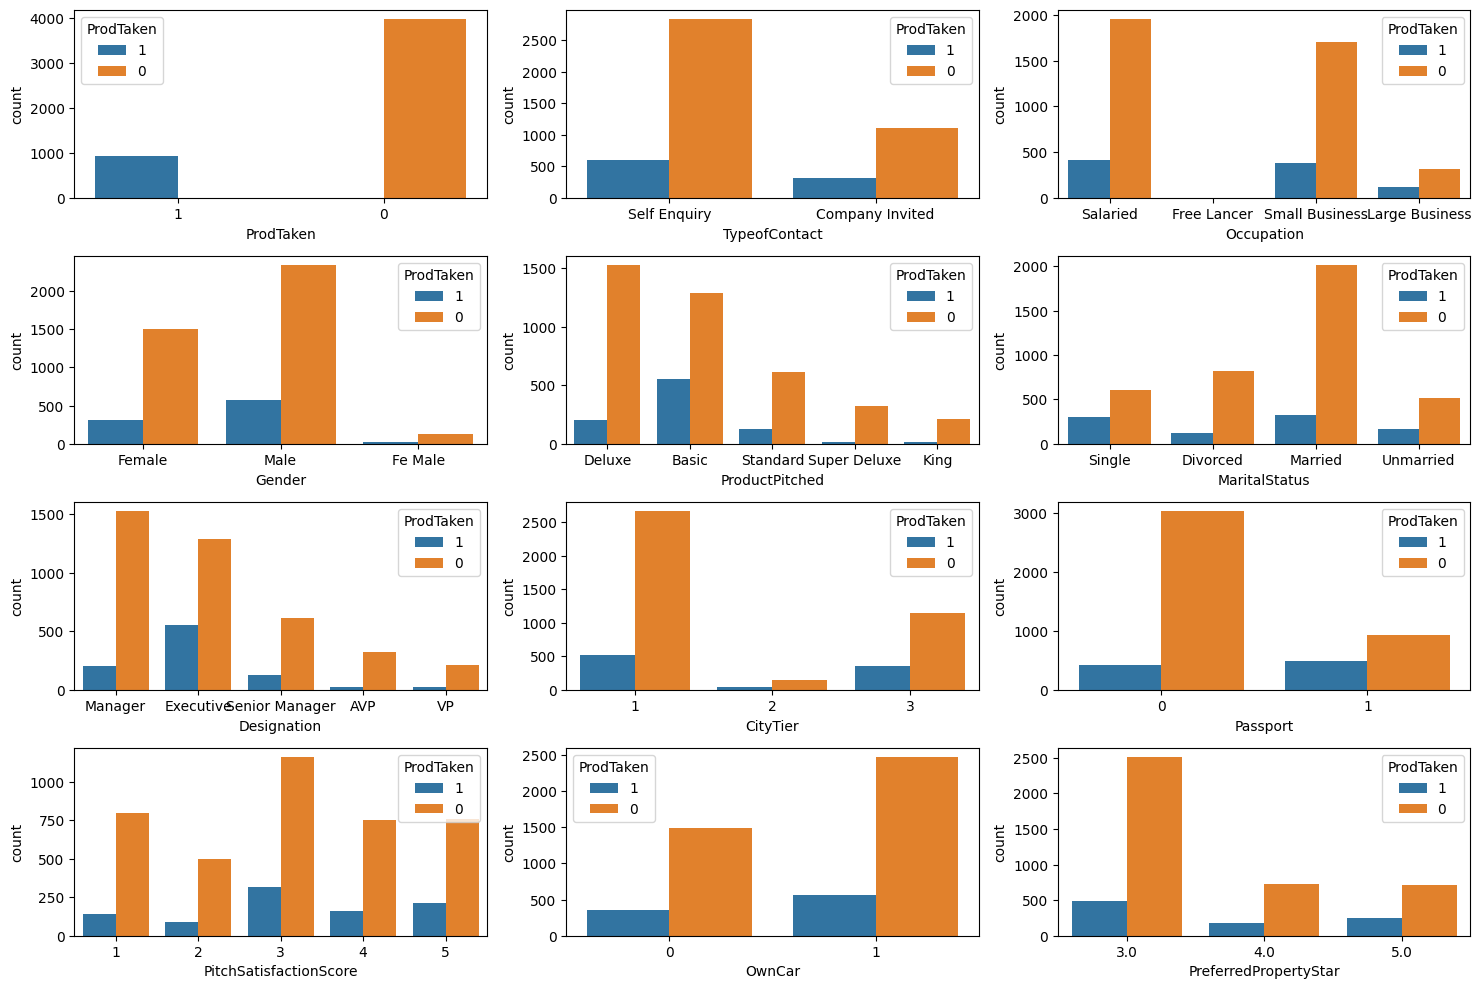

In [ ]:
# Import dataset
data2 = pd.read_csv('Travel.csv')

# Convert 'ProdTaken' to a categorical variable
data2['ProdTaken'] = data2['ProdTaken'].astype(str)

# List of categorical features (fitur kategorikal)
categorical_columns = [
    "ProdTaken",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
    "CityTier",
    "Passport",
    "PitchSatisfactionScore",
    "OwnCar",
    "PreferredPropertyStar"
]

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# Iterate through the categorical features and create countplots
for i, ax in enumerate(axes.flat):
    if i < len(categorical_columns):
        sns.countplot(data=data2, x=categorical_columns[i], hue='ProdTaken', ax=ax)

# Remove any remaining empty subplots
for i in range(len(categorical_columns), 6):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

In [ ]:
# Create an empty dictionary to store frequency counts for each feature
frekuensi_fitur_hue = {}

# Iterate through the categorical features and calculate frequency counts
for fitur in categorical_columns:
    frekuensi = data2.groupby([fitur, 'ProdTaken']).size().unstack()
    frekuensi_fitur_hue[fitur] = frekuensi

# Print the frequency counts for each feature
for fitur, frekuensi in frekuensi_fitur_hue.items():
    print(f"Frekuensi kategori dalam fitur {fitur} dengan mempertimbangkan 'ProdTaken':")
    print(frekuensi)
    print()

Frekuensi kategori dalam fitur ProdTaken dengan mempertimbangkan 'ProdTaken':
ProdTaken       0      1
ProdTaken               
0          3968.0    NaN
1             NaN  920.0

Frekuensi kategori dalam fitur TypeofContact dengan mempertimbangkan 'ProdTaken':
ProdTaken           0    1
TypeofContact             
Company Invited  1109  310
Self Enquiry     2837  607

Frekuensi kategori dalam fitur Occupation dengan mempertimbangkan 'ProdTaken':
ProdTaken            0      1
Occupation                   
Free Lancer        NaN    2.0
Large Business   314.0  120.0
Salaried        1954.0  414.0
Small Business  1700.0  384.0

Frekuensi kategori dalam fitur Gender dengan mempertimbangkan 'ProdTaken':
ProdTaken     0    1
Gender              
Fe Male     130   25
Female     1500  317
Male       2338  578

Frekuensi kategori dalam fitur ProductPitched dengan mempertimbangkan 'ProdTaken':
ProdTaken          0    1
ProductPitched           
Basic           1290  552
Deluxe          1528  204
Ki

**1. TypeofContact vs. ProdTaken** <br>
Type Self Enquiry kurang efektif dalam mempengaruhi pembelian. <br>
**2. Occupation vs. ProdTaken** <br>
Pekerjaan Free Lancer kurang membeli produk <br>
Pekerjaan Salaried paling banyak membeli produk tetapi jika dibandingkan dengan total orang yang bekerja salaried, angka tersebut tergolong kecil. <br>
**3. Gender vs. ProdTaken** <br>
Jenis Kelamin Male lebih cenderung membeli produk.<br>
**4. ProductPitched vs. ProdTaken** <br>
Pelanggan dengan Produk Basic paling banyak membeli produk baru.<br>
Pelanggan dengan Produk King dan Super Deluxe kurang membeli produk baru.<br>
**5. MaritalStatus vs. ProdTaken** <br>
Penduduk yang sudah menikah paling banyak membeli produk tetapi jika dibandingkan dengan total penduduk yang menikah, angka tersebut tergolong kecil <br>
Penduduk Single dan Unmarried juga banyak yang membeli produk. Jika dibandingkan dengan total penduduk single dan unmarried, ini bisa dijadikan target pelanggan perusahaan.<br>
**6. Designation vs. ProdTaken** <br>
Jabatan Executif cenderung membeli produk.<br>
Jabatan AVP kurang membeli produk.<br>
**7. CityTier vs. ProdTaken**<br>
Penduduk dengan CityTier 3 dan 1 cenderung membeli produk.<br>
**8. Passport vs. ProdTaken**<br>
Penduduk yang memiliki passport cenderung membeli produk.<br>
**9. PitchSatisfactionScore vs. ProdTaken**<br>
Pelanggan dengan skor kepuasaan 5 cenderung membeli produk.<br>
Pelanggan dengan skor kepuasaan 3 juga banyak yang memutuskan membeli produk.<br>
**10. OwnCar vs. ProdTaken**<br>
Pelanggan yang tidak mempunyai mobil cenderung membeli produk.<br>
Meskipun pelanggan yang memiliki mobil lebih banyak yang membeli produk tetapi jika dibandingkan dengan total pelanggan yang memiliki mobil, itu tergolong kecil.<br>
**11. PreferedPropertyStar vs. ProdTaken**<br>
Pelaggan dengan preferren property star 5.0 cenderung membeli produk.

**KESIMPULAN**
- Kolom CustomerID tidak diperlkan karena tidak mempengaruhi label (ProdTaken).
- Kolom numerik (Age dan MonthlyIncome) harus dipertahankan karena memiliki korelasi yang tinggi dengan label.
- Kolom dengan data kategorik dipertahankan.
- Kolom yang tidak berkorelasi juga dipertahankan karena mungkin akan berguna di analisis yang selanjutnya.


### b. Korelasi Fitur-Fitur

In [ ]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = data.corr()

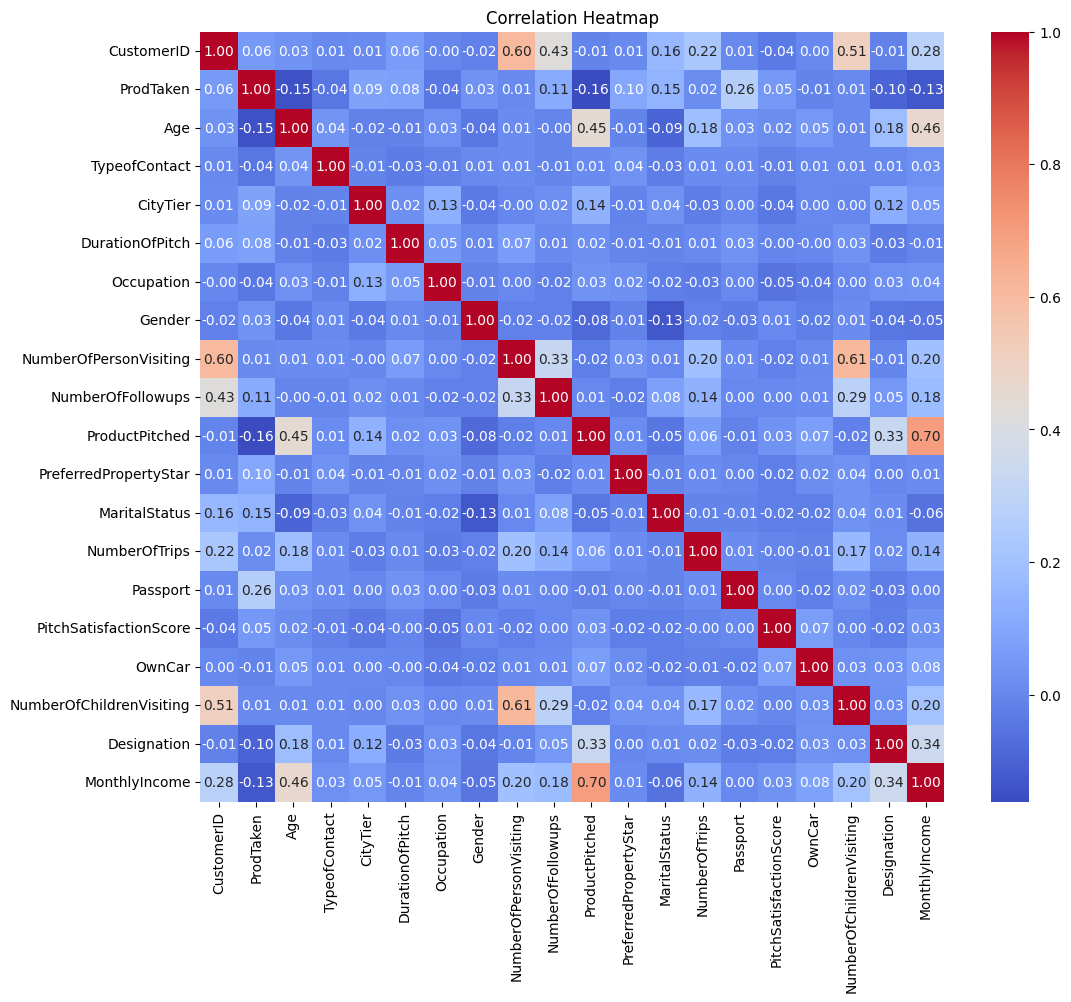

In [ ]:
# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<Figure size 1000x1000 with 0 Axes>

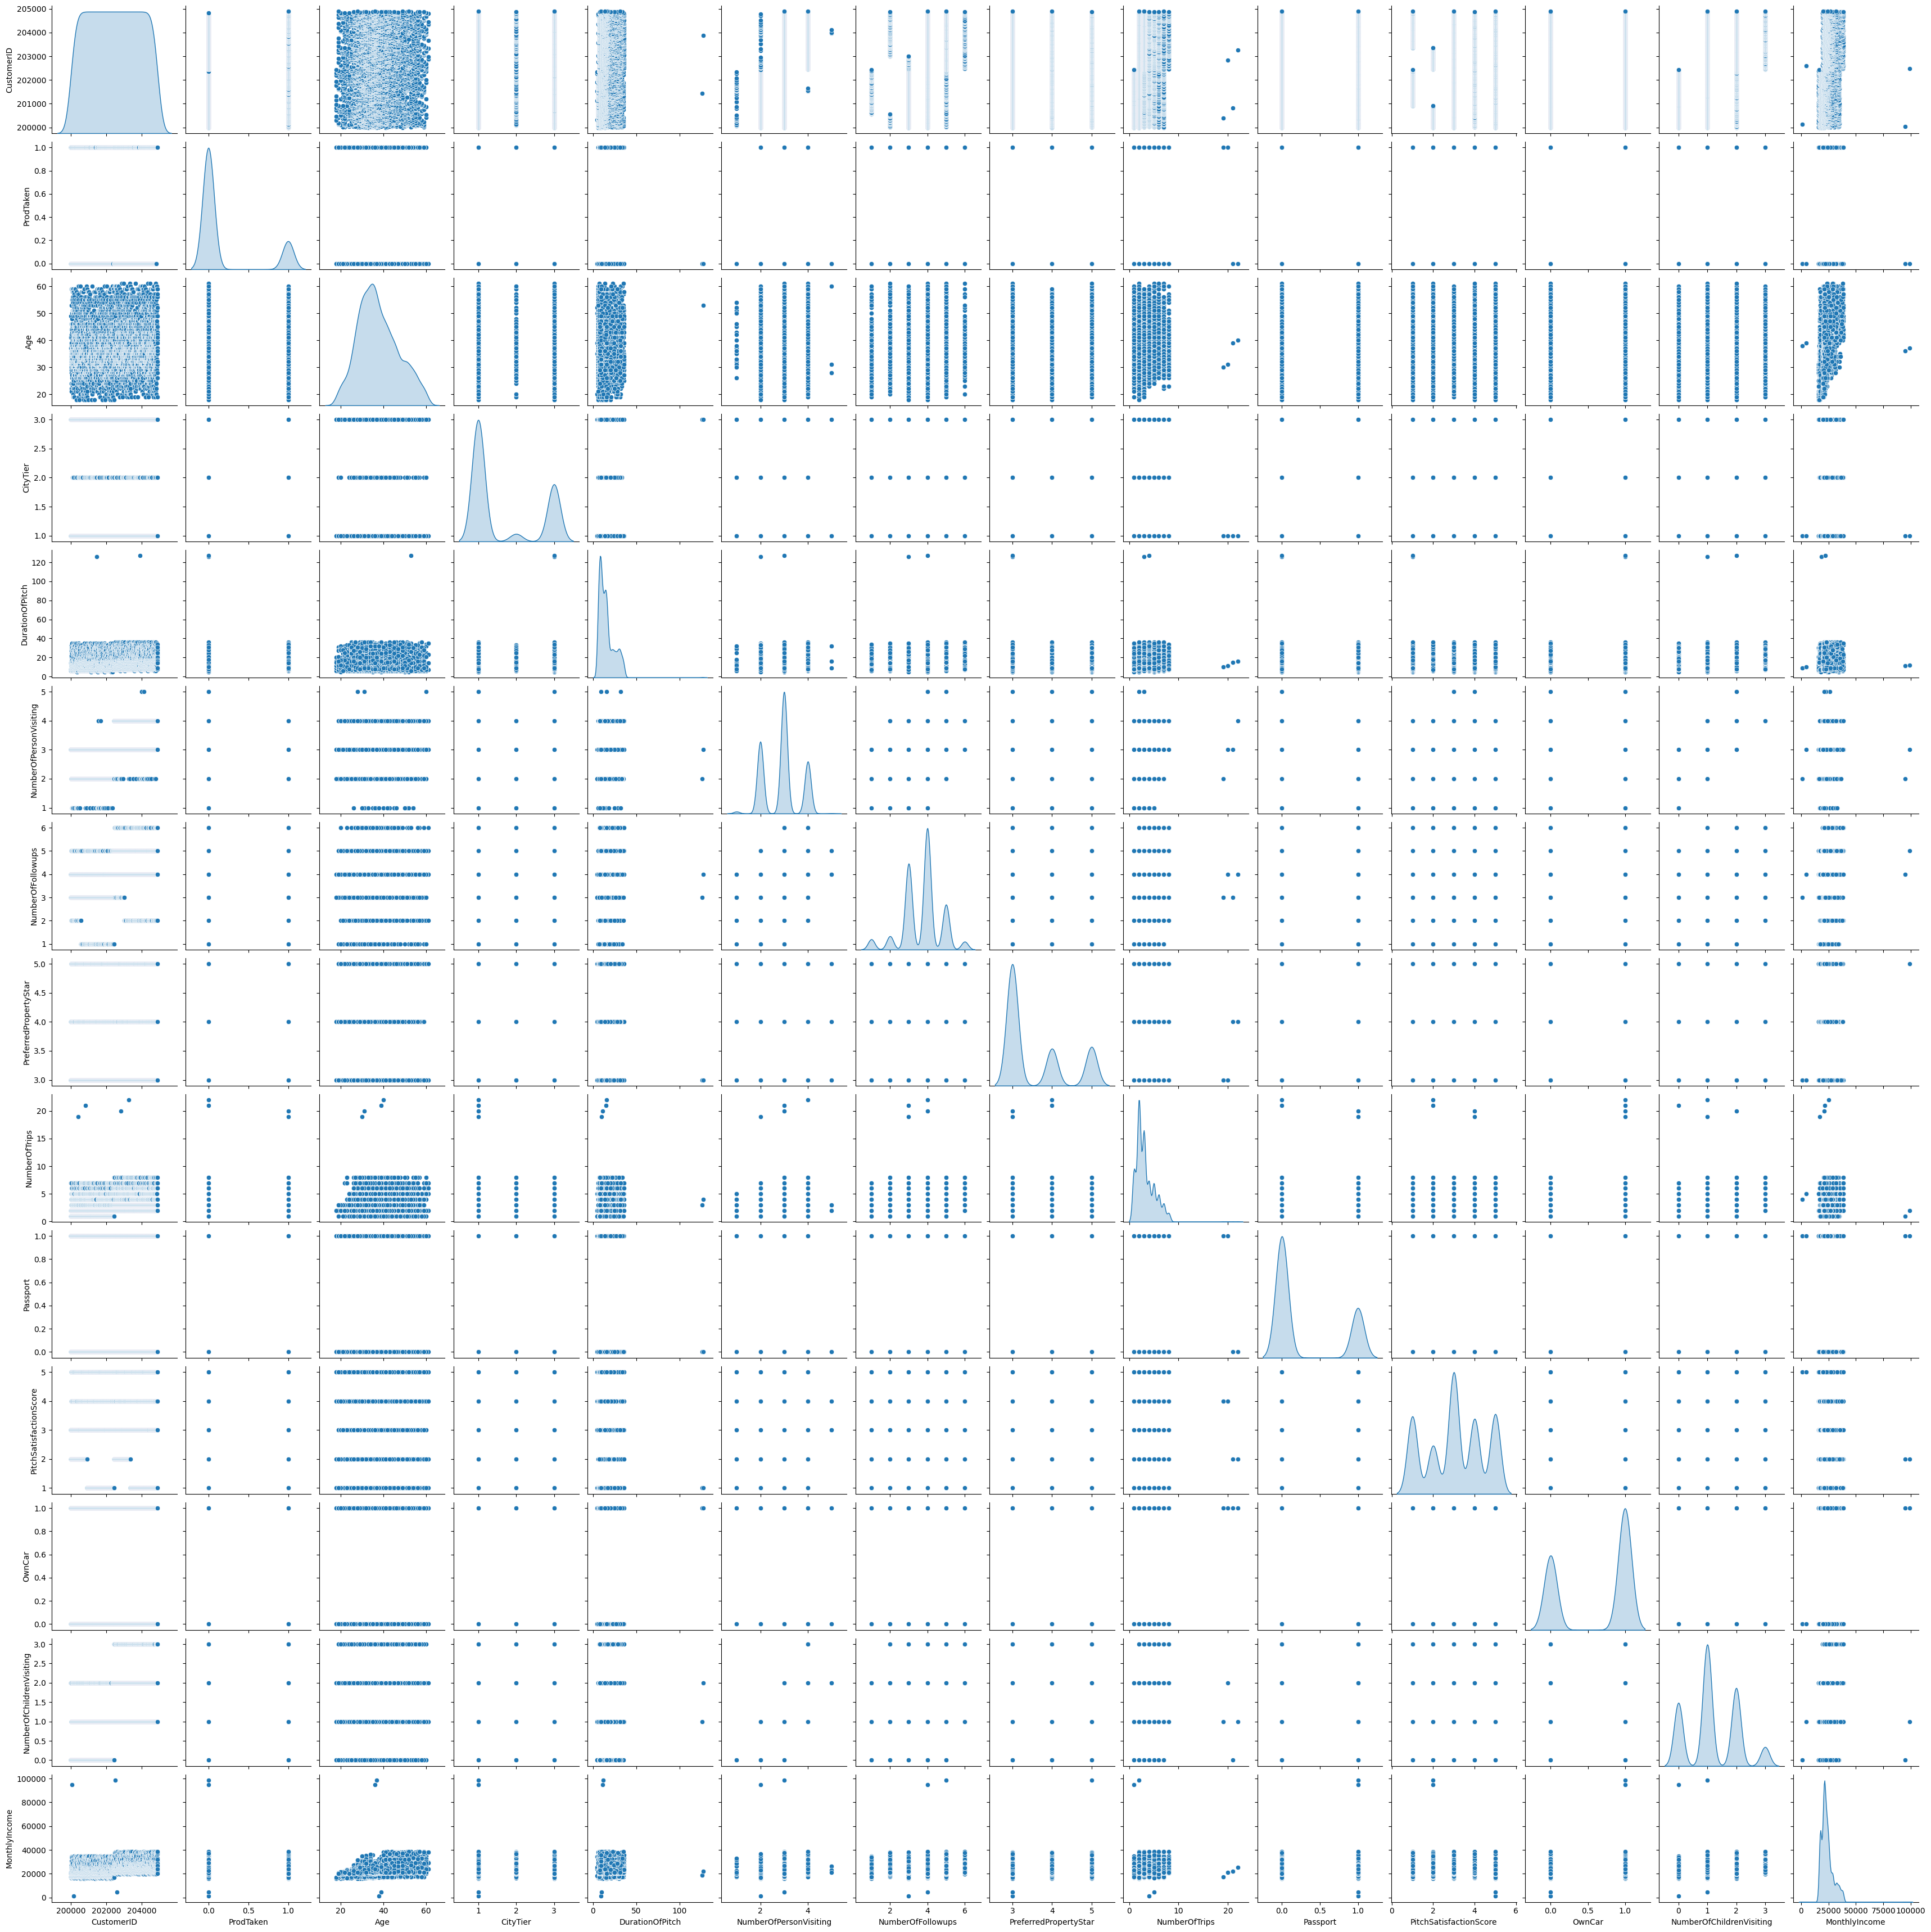

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')

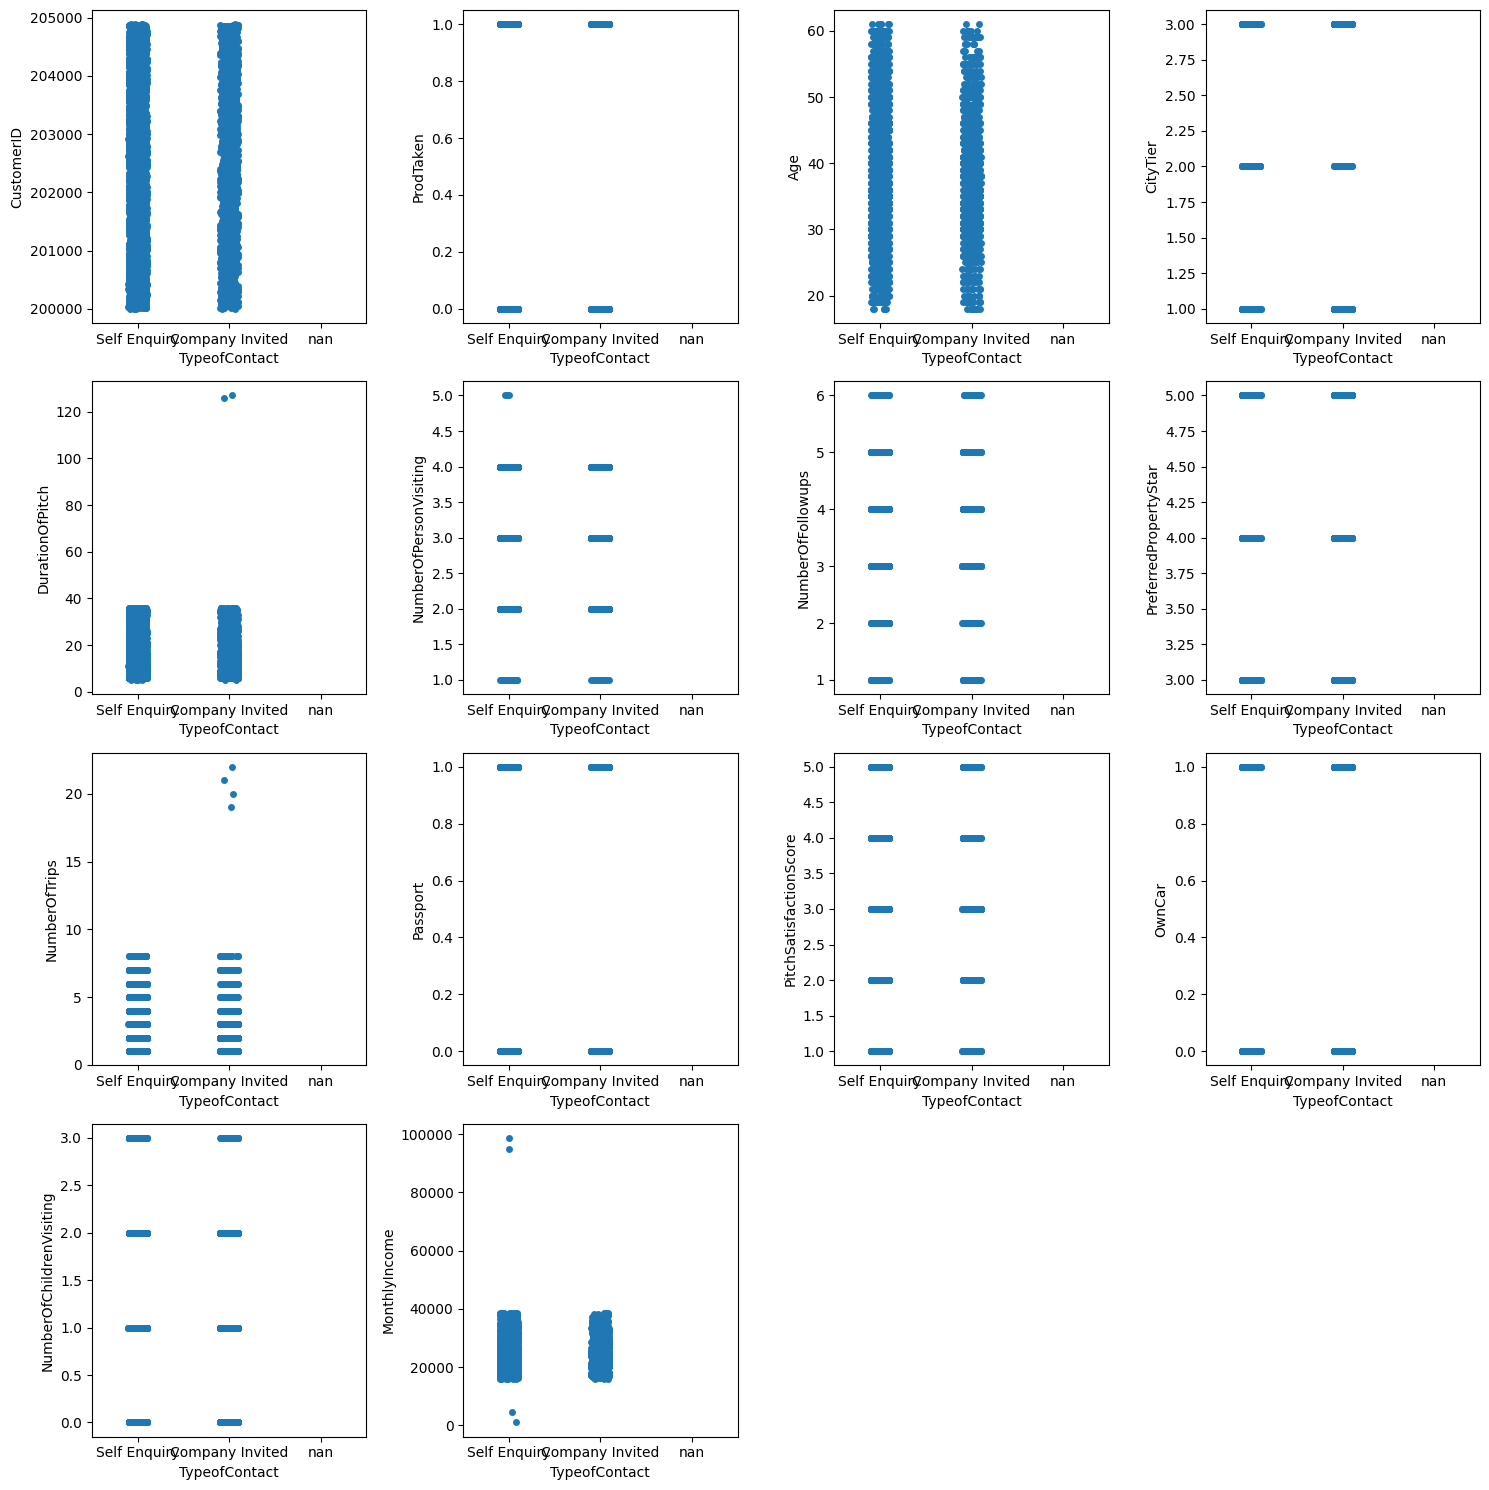

In [ ]:
#korelasi antara feature nums dan cats
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='TypeofContact', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

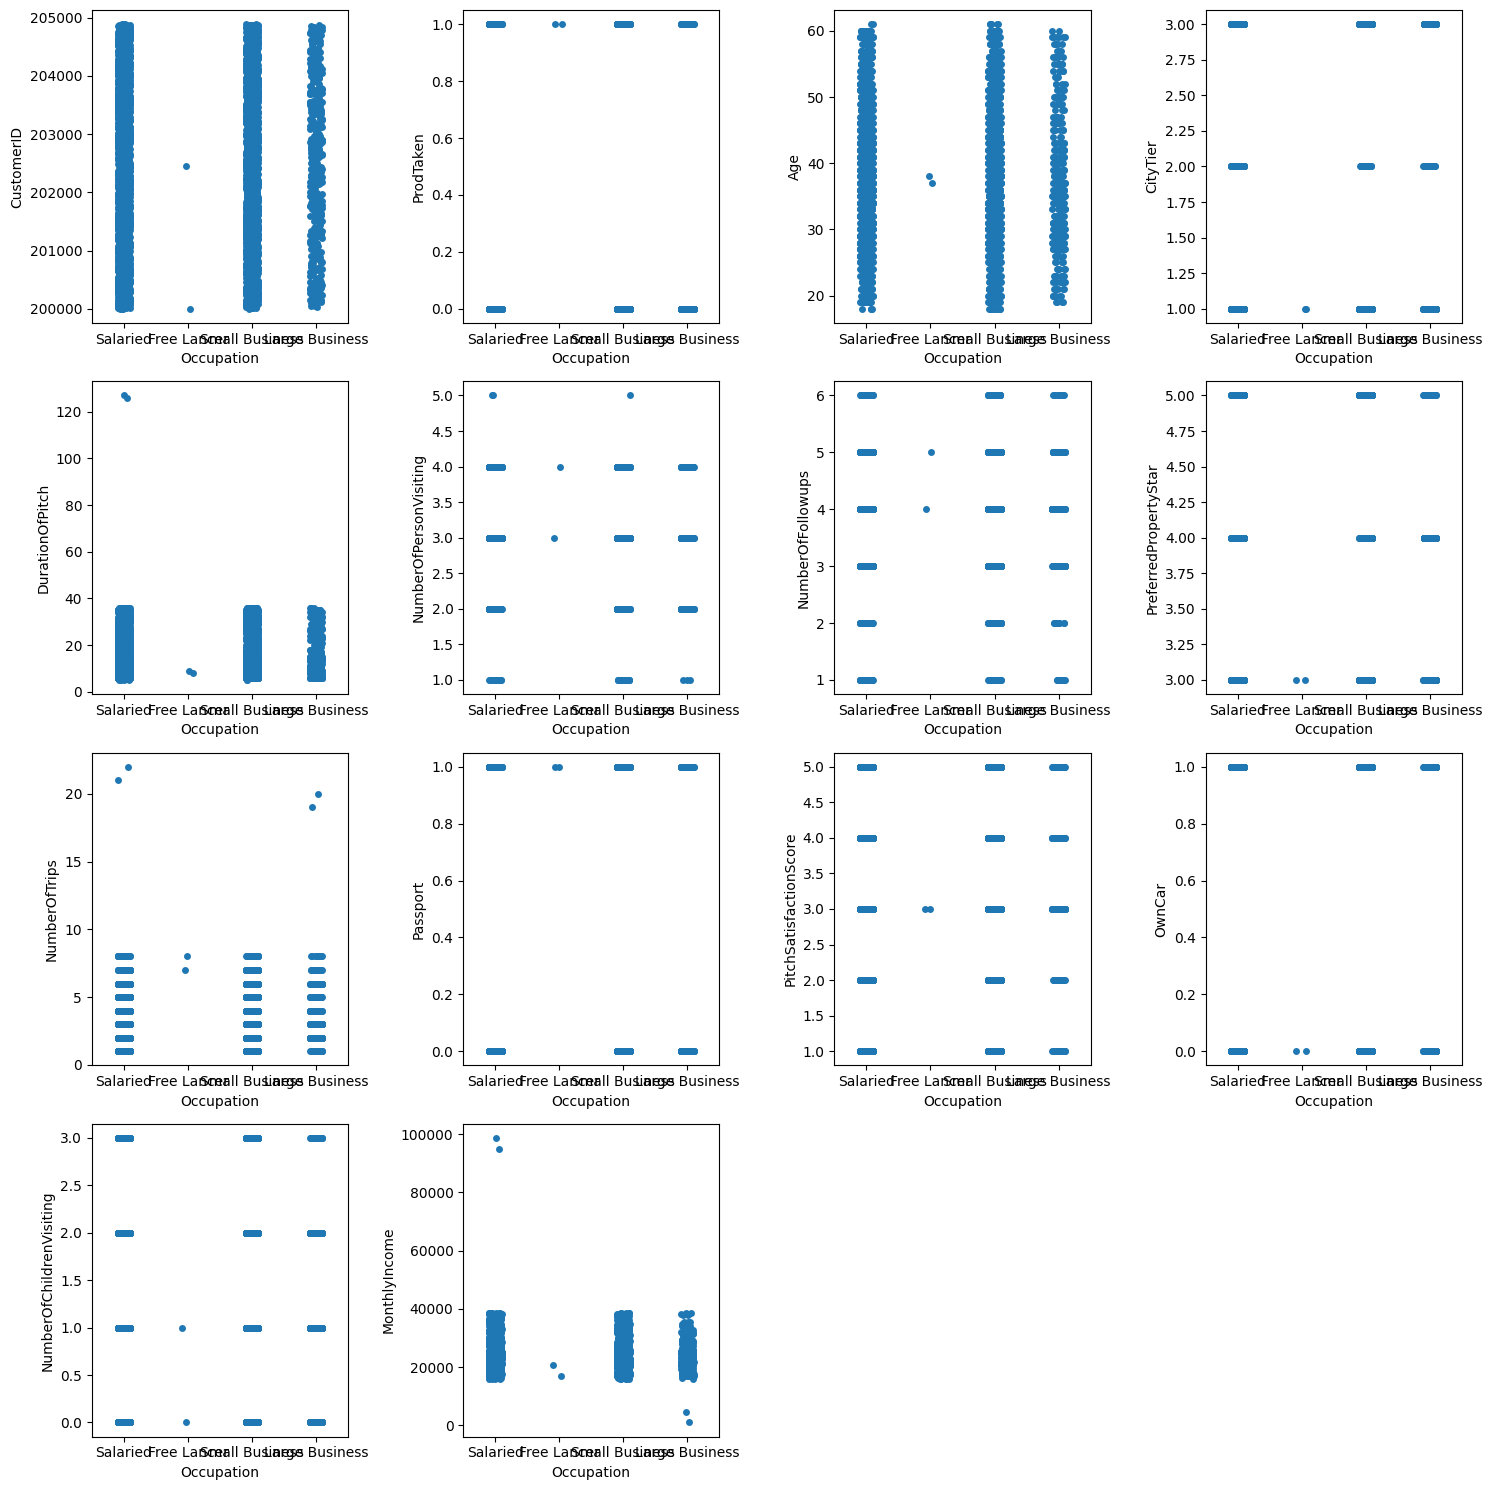

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Occupation', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

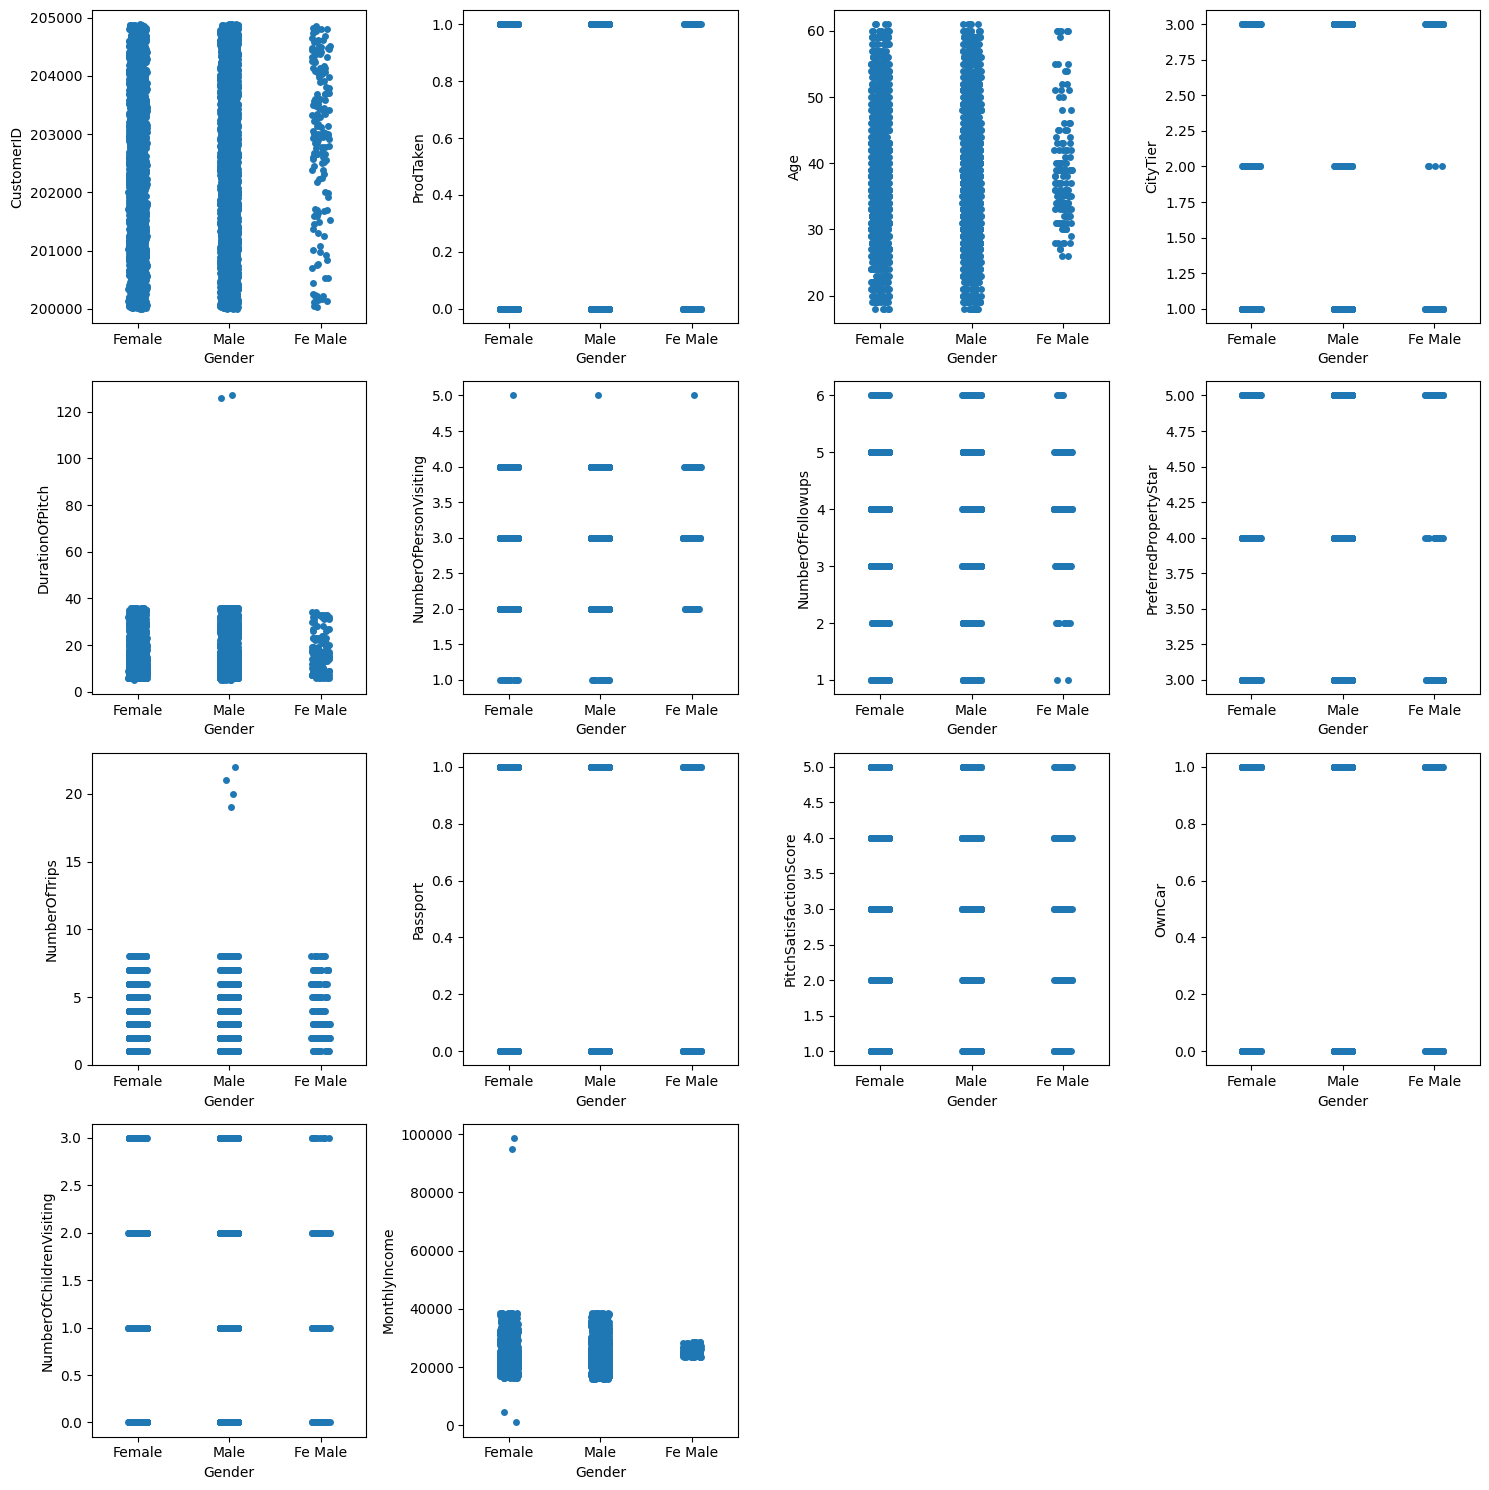

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

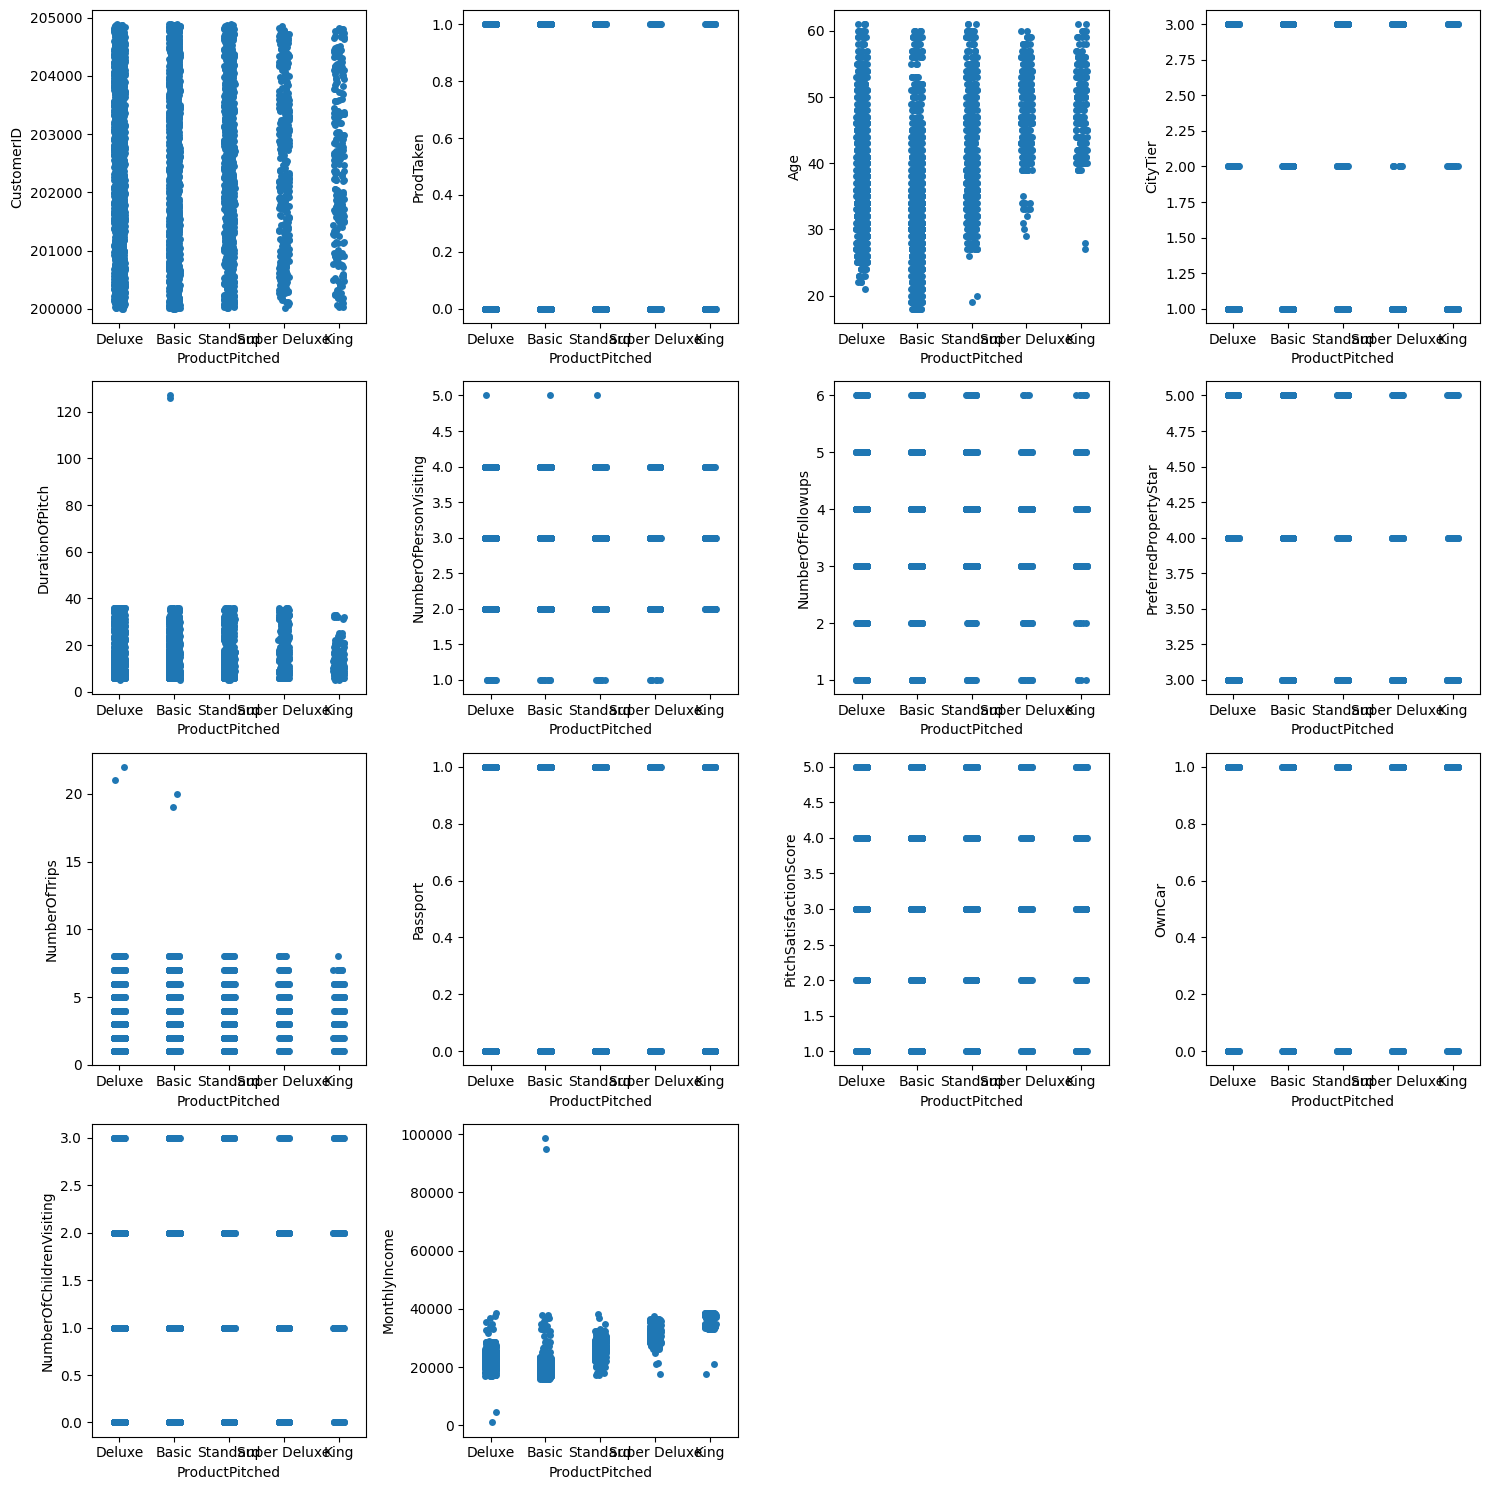

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='ProductPitched', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

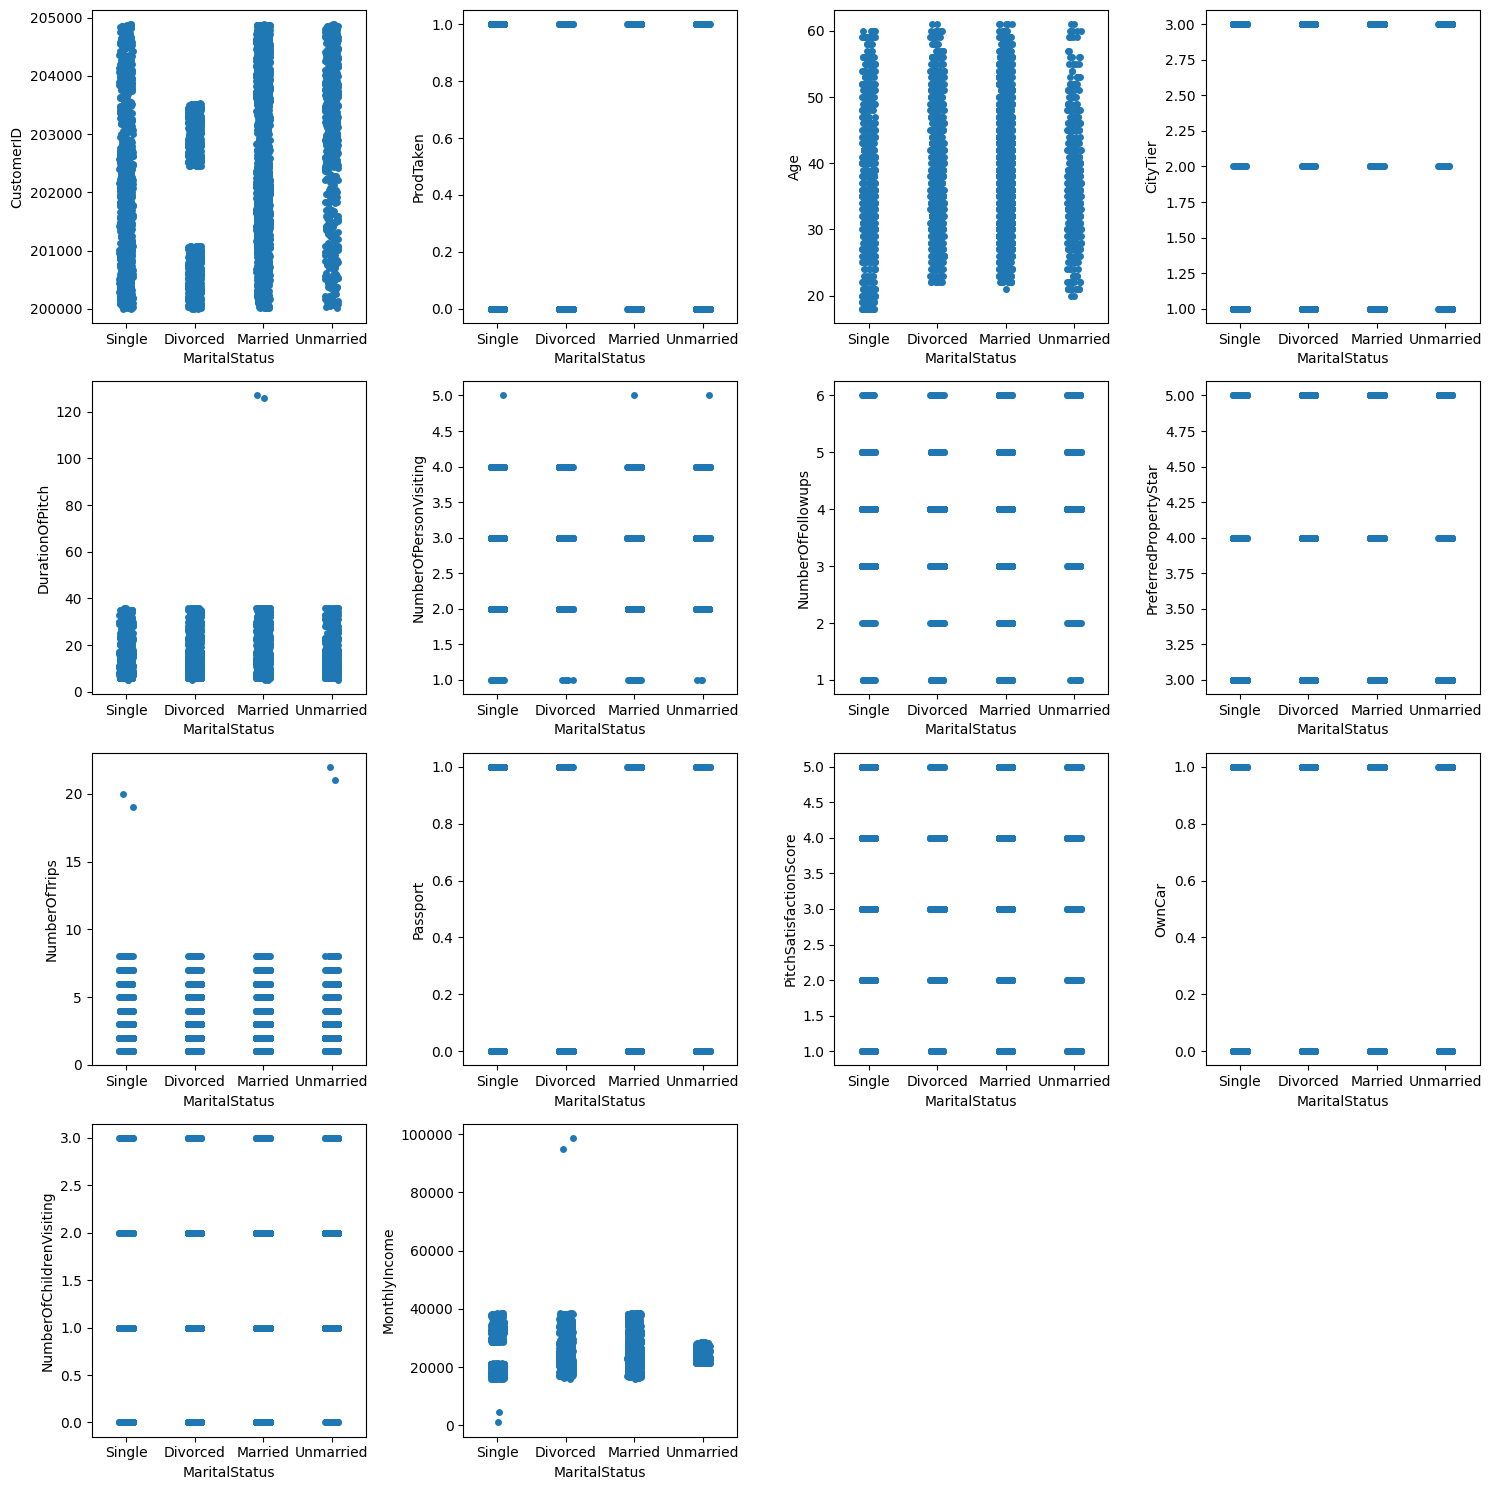

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='MaritalStatus', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

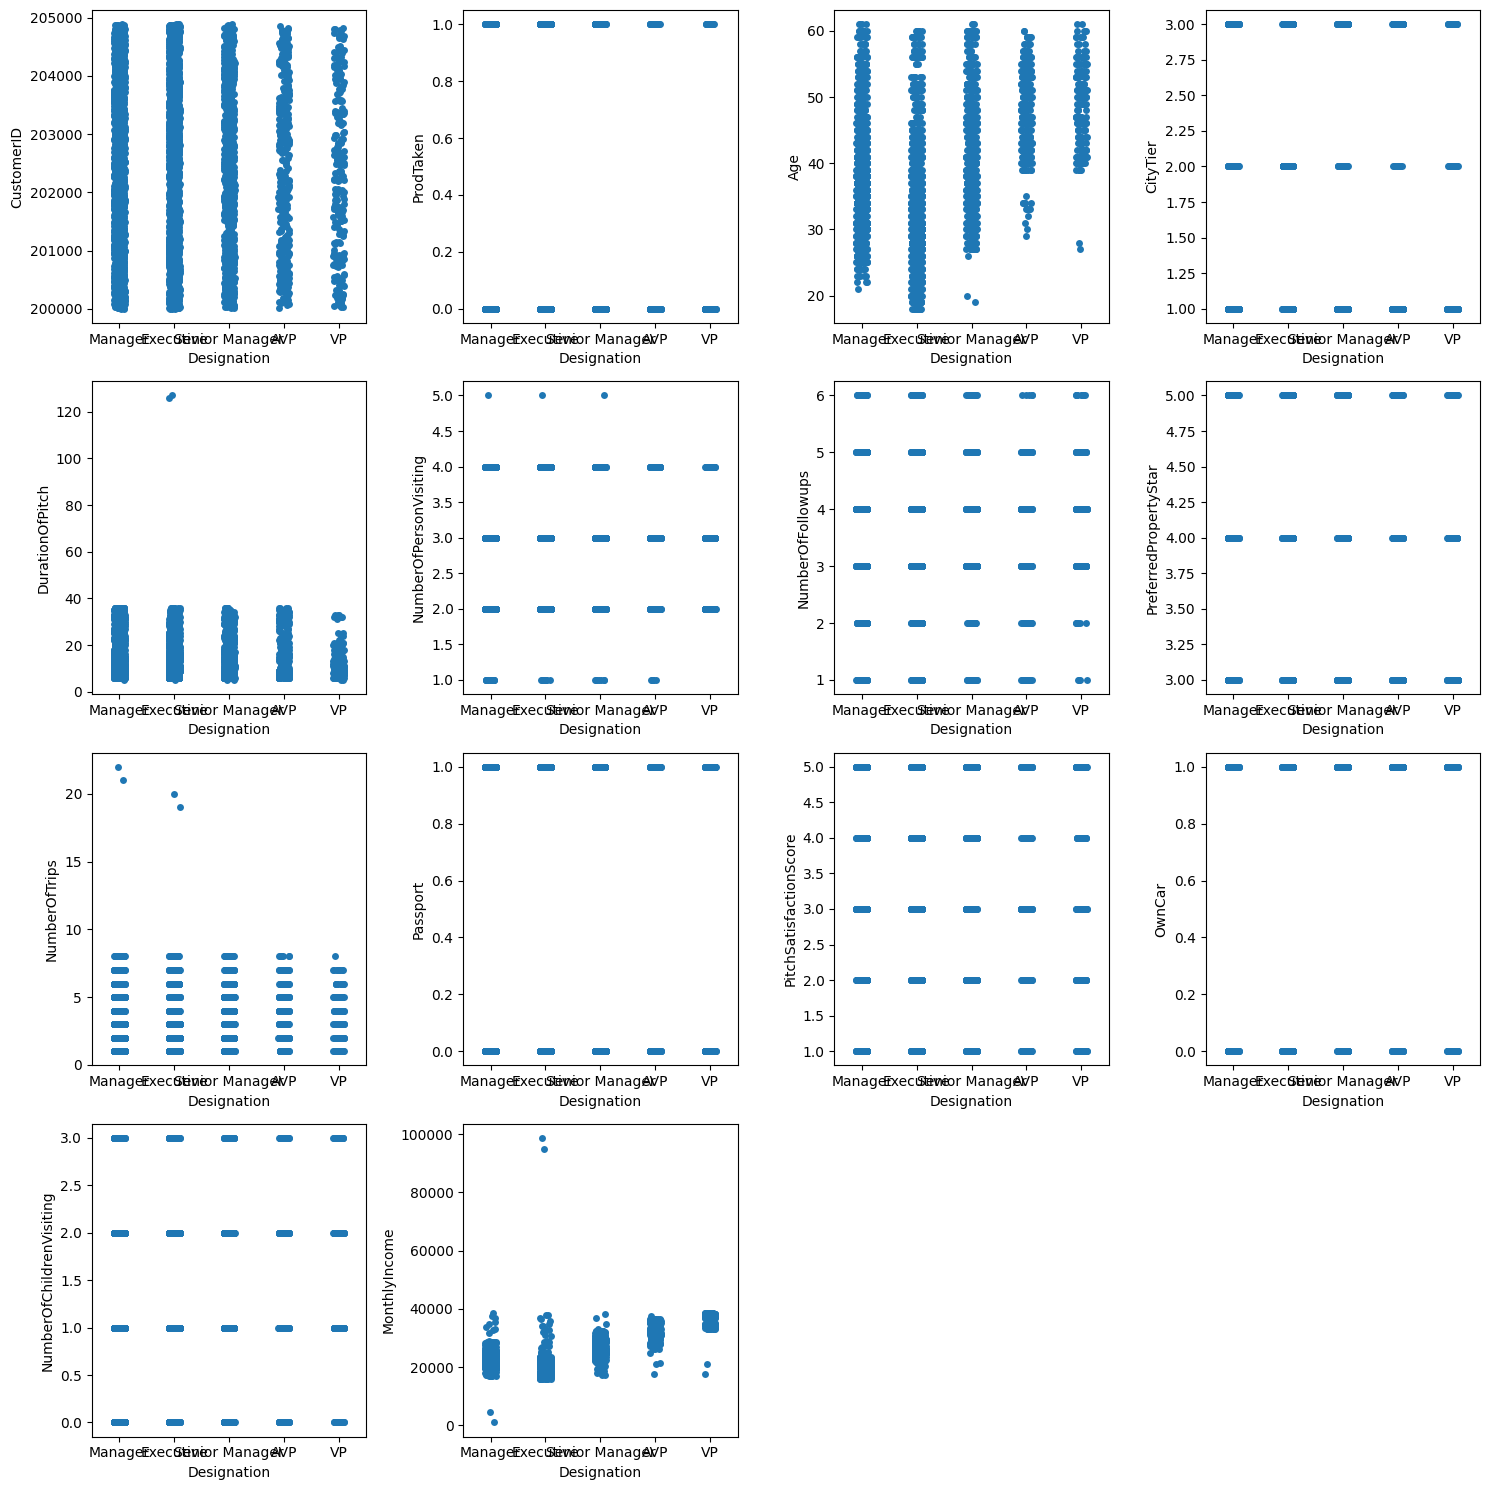

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Designation', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

Beberapa pasangan fitur memiliki korelasi mendekati nol, yang menunjukkan ketidakterhubungan antara mereka. Contoh yang mencolok adalah "DurationOfPitch" dengan "Gender" dan "MaritalStatus" dengan "Passport." Hal ini menunjukkan bahwa perubahan dalam salah satu fitur tidak secara signifikan mempengaruhi fitur lainnya.

## 4. Business Insight

### a. Business Insight 1

In [ ]:
# Produk apa yang paling banyak dibeli? (dalam persentase)
df_product = df.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df.groupby(['ProductPitched'])['CustomerID'].count(),on = 'ProductPitched')
df_product = df_product[df_product.ProdTaken==1].reset_index(drop=True)
df_product['%']=round(df_product.TotalCust/df_product.CustomerID*100,2)
df_product = df_product.sort_values(by='%',ascending=False)
df_product

ProductPitched  ProdTaken  TotalCust  CustomerID      %
0          Basic          1        552        1842  29.97
3       Standard          1        124         742  16.71
1         Deluxe          1        204        1732  11.78
2           King          1         20         230   8.70
4   Super Deluxe          1         20         342   5.85

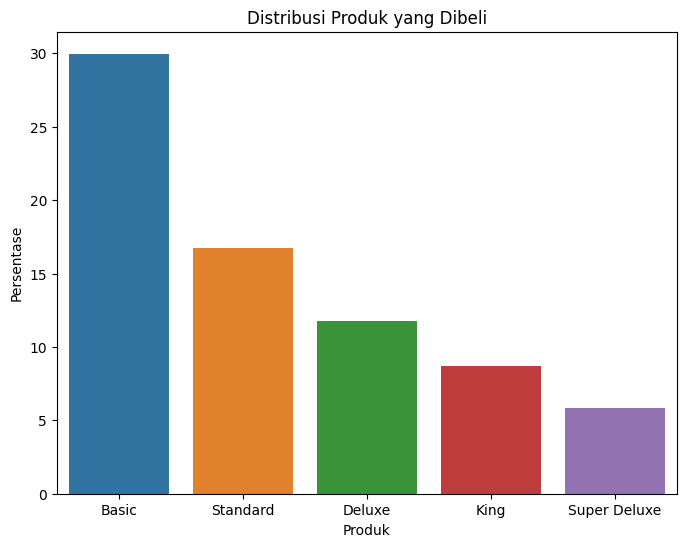

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=df_product, x="ProductPitched", y="%")
plt.title("Distribusi Produk yang Dibeli")
plt.xlabel("Produk")
plt.ylabel("Persentase")
plt.show()

Insight :
- terlihat bahwa produk "Basic" adalah produk yang paling banyak dibeli dalam persentase dibandingkan dengan produk lainnya.
Produk "Basic" memiliki persentase pembelian yang tinggi dibandingkan dengan produk lainnya.

Rekomendasi Bisnis:
- Fokus pemasaran: Perusahaan dapat mempertimbangkan untuk lebih fokus dalam pemasaran produk "Basic," karena produk ini paling banyak diminati oleh pelanggan. Ini dapat membantu meningkatkan penjualan.
- Penawaran khusus: Perusahaan juga dapat mencoba menawarkan penawaran khusus atau promosi terkait dengan produk "Basic" untuk menarik lebih banyak pelanggan.

### b. Business Insight 2

In [ ]:
df_maritalstatus = df.groupby(['MaritalStatus', 'ProdTaken'])['CustomerID'].count().reset_index()
df_maritalstatus.columns = ['MaritalStatus', 'ProdTaken', 'Count']

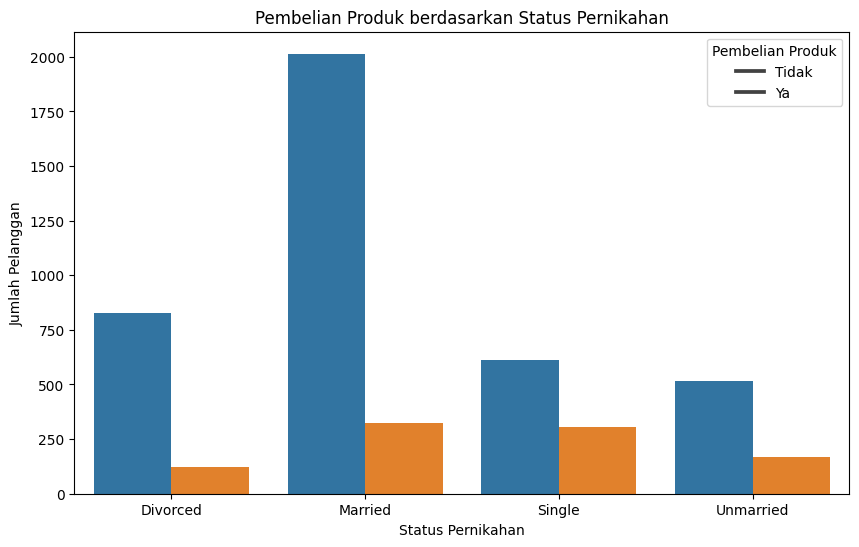

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalStatus', y='Count', hue='ProdTaken', data=df_maritalstatus)

plt.title("Pembelian Produk berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah Pelanggan")

plt.legend(title="Pembelian Produk", labels=["Tidak", "Ya"])

plt.show()

Insight:
Pelanggan yang married memiliki tingkat pembelian produk yang lebih tinggi dibandingkan dengan pelanggan yang single, divorced dan unmarried
Hal tersebut mengindikasikan bahwa pelanggan yang married lebih terbuka terhadap produk baru yang akan ditawarkan serta lebih mungkin melakukan pembelian.

Rekomendasi Bisnis:
Perusahaan dapat mempertimbangkan untuk melakukan upaya promosi yang lebih besar kepada pelanggan yang married, seperti paket keluarga.



### c. Business Insight 3

In [ ]:
# Apakah orang yang memiliki paspor cenderung membeli produk?
df_passport = df.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['%']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='%',ascending=False).reset_index(drop=True)
df_passport

Passport  ProdTaken  CustomerID_x  CustomerID_y      %
0         1          1           494          1422  34.74
1         0          1           426          3466  12.29

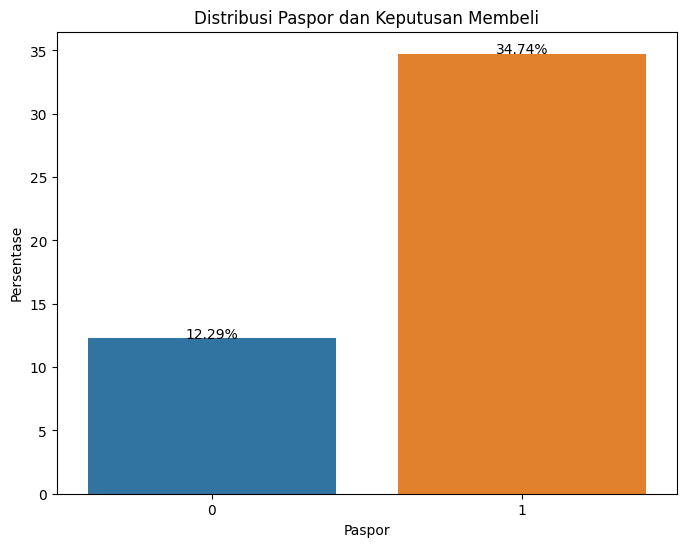

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_passport, x="Passport", y="%")
plt.title("Distribusi Paspor dan Keputusan Membeli")
plt.xlabel("Paspor")
plt.ylabel("Persentase")

# Menambahkan persentase
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

Insight:
- Terlihat bahwa orang yang memiliki paspor (Passport = 1) cenderung lebih cenderung membeli produk (ProdTaken = 1) dibandingkan dengan mereka yang tidak memiliki paspor (Passport = 0). Proporsi pelanggan yang memiliki paspor dan membeli produk lebih tinggi dibandingkan dengan pelanggan yang tidak memiliki paspor.

Rekomendasi Bisnis:
- Perusahaan dapat memberikan penawaran atau promosi khusus kepada pelanggan yang memiliki paspor sebagai insentif untuk membeli produk.

## 5. Git

[GitHub](https://github.com/Lack-of-Vacation/Travel-Customer-Prediction)

# Data Pre-Processing

In [6]:
# copy dataframe
df_prep = df.copy()

## 1. Data Cleansing

### A. Handle missing values

Mengapa handle missing values itu penting?
- Mengatasi missing values (nilai yang hilang) dalam data sangat penting karena nilai yang hilang tersebut dapat memiliki dampak yang signifikan pada analisis data dan pengambilan keputusan.

Bagaimana persentase missing value pada masing-masing kolom?

In [7]:
# Hitung Missing Values
missing_data = df_prep.isnull().sum()

# Hitung Total Data
total_data = df_prep.shape[0]

# Hitung Persentase missing values setiap kolom
percentage_missing = (missing_data / total_data) * 100
percentage_missing

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

Masing-masing kolom yang terdapat missing value memiliki persentase yang kecil. Sehingga cara yang tepat untuk mengatasi missing value tersebut adalah dengan melakukan imputasi.

Data yang missing value dapat diisi dengan:
1. Nilai Mean: <br> Digunakan pada data dengan nilai numerik dan berdistribusi normal, karena distribusi yang simetris/normal berarti bahwa rata-rata dan median sangat dekat satu sama lain.
2. Nilai Median: <br> Digunakan pada data dengan nilai numerik dan distribusi skew, karena median kurang sensitif terhadap nilai-nilai ekstrem atau outlier dan memberikan gambaran yang lebih baik tentang pusat distribusi dalam kasus distribusi yang tidak simetris.
3. Nilai Modus: <br> Digunakan pada data dengan nilai kategorik

In [8]:
# Handling missing value numeric_columns

# Imputasi kolom numerikal dengan nilai rata-rata
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['NumberOfFollowups'].fillna(df_prep['NumberOfFollowups'].mean(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(df_prep['NumberOfChildrenVisiting'].mean(), inplace=True)

# Imputasi kolom numerikal dengan nilai median
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [9]:
# Handling missing value categorical_columns
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
df_prep['TypeofContact'].fillna(df_prep['TypeofContact'].mode()[0], inplace=True)
df_prep['PreferredPropertyStar'].fillna(df_prep['PreferredPropertyStar'].mode()[0], inplace=True)

In [10]:
df_prep.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### B. Handle duplicated data

Handle Duplicated Data sangat penting karena data duplikasi dapat mempengaruhi akurasi data serta mengganggu efisiensi sistem pengolahan data.  Selain itu, data duplikasi juga dapat memengaruhi analisis data serta memengaruhi pengambilan keputusan yang tepat.
Menghandle duplikasi data meningkatkan akurasi, efisiensi, keamanan, dan kemampuan organisasi/perusahaan untuk mengambil keputusan berdasarkan data yang tepat dan bersih.

Mengecek apakah dalam dataframe terdapat duplikasi

In [11]:
#mengecek duplikat
duplicate_rows = df_prep[df_prep.duplicated(keep='first')]

if duplicate_rows.empty:
    print("Tidak ada baris duplikat dalam DataFrame.")
else:
    print("Baris Duplikat:")
    print(duplicate_rows)

Tidak ada baris duplikat dalam DataFrame.


Diketahui dalam dataframe tidak terdapat duplikasi data, sehingga menghandle kesalahan pada kolom Gender (Fe Male digabungkan ke Female), serta handle kolom MaritalStatus (Unmarried digabungkan ke Single)

In [12]:
def fix_gender(gender):
    if gender == 'Fe Male':
        return 'Female'
    return gender

df_prep['Gender'] = df_prep['Gender'].apply(fix_gender)

df_prep['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Pada kolom Gender, terdapat kesalahan input yaitu 'Fe Male'. Sedangkan terdapat juga jawaban 'Female' sehingga untuk mencegah duplikat data 'Fe Male' digabungkan ke 'Female'

In [13]:
def fix_marital_status(status):
    if status == 'Unmarried':
        return 'Single'
    return status

df_prep['MaritalStatus'] = df_prep['MaritalStatus'].apply(fix_marital_status)

df_prep['MaritalStatus'].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

Pada kolom MaritalStatus, terdapat data yang tidak konsisten yaitu Unmarried, sehingga Unmarried digabungkan ke Single karena keduanya merujuk kepada istilah yang sama, yaitu lajang

### C. Handle outliers

Dari EDA yang sudah dilakukan pada minggu sebelumnya, diketahui bahwa kolom DurationOfPitch, NumberOfTrips, MonthlyIncome memiliki outliers yang harus diatasi/handle. Outliers dapat memengaruhi performa model statistik atau machine learning, sehingga mengatasi outliers adalah langkah yang penting dalam menghasilkan output yang lebih akurat dan konsisten.

In [14]:
# Log transform kolom MonthlyIncome
df_prep['MonthlyIncome'] = np.log1p(df_prep['MonthlyIncome'])

Kolom MonthlyIncome memiliki distribusi yang kemiringannya (skew) cukup signifikan, maka dilakukan log-transform agar distribusinya lebih simetris.

In [15]:
# Identifikasi outliers
z_scores = np.abs(stats.zscore(df_prep[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']]))
outliers_low = (z_scores < -3).any(axis=1)  # Ambang batas bawah -3
outliers_high = (z_scores > 3).any(axis=1)  # Ambang batas atas 3

Mengidentifikasi outliers menggunakan metode z-score karena z-score adalah salah satu cara yang umum digunakan untuk mengukur sejauh mana suatu nilai berbeda dari rata-rata dalam distribusi data.

Kemudian menetapkan outliers rendah dan tinggi sebagai acuan dalam meng-handle outliers.

In [16]:
# Ganti outliers dengan nilai batas bawah atau atas yang belum termasuk outlier
lower_bound = df_prep[~outliers_low].min()
upper_bound = df_prep[~outliers_high].max()

df_prep['DurationOfPitch'].loc[outliers_low] = lower_bound['DurationOfPitch']
df_prep['DurationOfPitch'].loc[outliers_high] = upper_bound['DurationOfPitch']

df_prep['NumberOfTrips'].loc[outliers_low] = lower_bound['NumberOfTrips']
df_prep['NumberOfTrips'].loc[outliers_high] = upper_bound['NumberOfTrips']

df_prep['MonthlyIncome'].loc[outliers_low] = lower_bound['MonthlyIncome']
df_prep['MonthlyIncome'].loc[outliers_high] = upper_bound['MonthlyIncome']

<ipython-input-16-d9f2cd206e13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['DurationOfPitch'].loc[outliers_low] = lower_bound['DurationOfPitch']
<ipython-input-16-d9f2cd206e13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['DurationOfPitch'].loc[outliers_high] = upper_bound['DurationOfPitch']
<ipython-input-16-d9f2cd206e13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['NumberOfTrips'].loc[outliers_l

Mengidentifikasi batas bawah dan batas atas yang belum termasuk outlier. Kemudian mengganti nilai outliers dengan ketentuan sebagai berikut:
*   Nilai outliers rendah diganti menjadi nilai batas bawah yang belum termasuk outlier.
*   Nilai outliers tinggi diganti menjadi nilai batas atas yang belum termasuk outlier.

Alasan menerapkan ketentuan di atas yaitu:
*   Membuat data lebih konsisten dan mengurangi dampak ekstrem yang dapat mempengaruhi statistik atau model.
*   Tetap mempertahankan data yang tidak termasuk outliers agar informasi asli dalam data tidak hilang sepenuhnya.
*   Meminimalkan risiko mengenai apakah outliers benar-benar adalah kesalahan atau kejadian langka yang valid. Dengan mengganti dengan nilai batas bawah dan batas atas, kita tidak kehilangan data potensial yang valid.

In [17]:
df_prep.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4888.000000  4888.000000      4888.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.365589   
std      1411.188388     0.390925     9.098418     0.916583         8.058839   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    37.000000     1.000000        13.000000   
75%    203665.250000     0.000000    43.000000     3.000000        19.000000   
max    204887.000000     1.000000    61.000000     3.000000        36.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4888.000000            4888.000000   
mean                 2.905074           3.708445               3.577946   
std                  0.724891           0.997882               0.797005   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4888.000000  4888.000000             4888.000000  4888.000000   
mean        3.225450     0.290917                3.078151     0.620295   
std         1.766822     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max         8.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4888.000000    4888.000000  
mean                   1.187267      10.046808  
std                    0.852049       0.200980  
min                    0.000000       9.680969  
25%                    1.000000       9.927643  
50%                    1.000000      10.014492  
75%                    2.000000      10.144481  
max                    3.000000      10.563026

Setelah handling outliers, dapat dilihat nilai-nilai statistik pada kolom yang ditangani menjadi lebih stabil.

### D. Feature transformation

In [18]:
# # berat dan tinggi kita re-scale
# df['DurationOfPitch_norm'] = MinMaxScaler().fit_transform(df['DurationOfPitch'].values.reshape(len(df), 1))

# # kita standarisasi (karena distribusi datanya sudah mendekati normal)
# df['DurationOfPitch_std'] = StandardScaler().fit_transform(df['DurationOfPitch'].values.reshape(len(df), 1))

In [19]:
# df[['DurationOfPitch','DurationOfPitch_std','DurationOfPitch_norm']].describe()

<ipython-input-20-8fccdc24fd85>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_prep['DurationOfPitch'], shade=True)
<ipython-input-20-8fccdc24fd85>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_prep['NumberOfTrips'], shade=True)
<ipython-input-20-8fccdc24fd85>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_prep['MonthlyIncome'], shade=True)


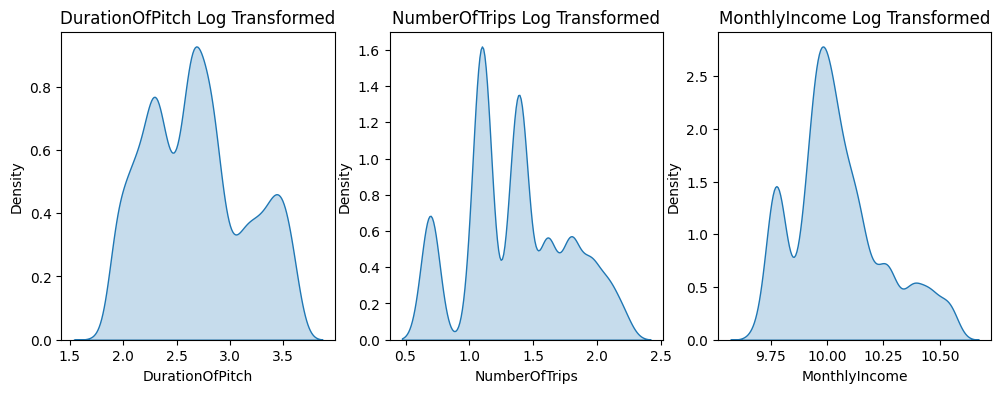

In [20]:
# Log Transform pada DurationOfPitch, NumberOfTrips
df_prep['DurationOfPitch'] = np.log1p(df_prep['DurationOfPitch'])
df_prep['NumberOfTrips'] = np.log1p(df_prep['NumberOfTrips'])
# df_prep['MonthlyIncome'] = np.log1p(df_prep['MonthlyIncome'])

# Plot distribusi data setelah transformasi log
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.kdeplot(df_prep['DurationOfPitch'], shade=True)
plt.title('DurationOfPitch Log Transformed')

plt.subplot(132)
sns.kdeplot(df_prep['NumberOfTrips'], shade=True)
plt.title('NumberOfTrips Log Transformed')

plt.subplot(133)
sns.kdeplot(df_prep['MonthlyIncome'], shade=True)
plt.title('MonthlyIncome Log Transformed')

plt.show()

Transformasi fitur logaritma (log transform) adalah teknik yang berguna untuk mengatasi distribusi data yang cenderung condong (skewed) dan untuk mengurangi efek outlier. Pada dataset kami dilakukan Log Transform pada DurationOfPitch, NumberOfTrips, yang dimana log transformation itu digunakan pada data yang right-skewed setelah dilakukan feature transformation maka distribusi hasil transformasi akan mendekati distribusi normal jika dilihat dari hasil grafik tersebut.

In [21]:
scaler = StandardScaler()
df_prep[numeric_columns] = scaler.fit_transform(df_prep[numeric_columns])

df_prep.head()

CustomerID  ProdTaken           Age    TypeofContact  CityTier  \
0      200000          1  3.712822e-01     Self Enquiry         3   
1      200001          0  1.250646e+00  Company Invited         1   
2      200002          1 -6.839967e-02     Self Enquiry         1   
3      200003          0 -5.080815e-01  Company Invited         1   
4      200004          0 -7.810318e-16     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0        -1.583905        Salaried  Female                0.130966   
1         0.052012        Salaried    Male                0.130966   
2        -1.044464     Free Lancer    Male                0.130966   
3        -0.818310        Salaried  Female               -1.248694   
4        -1.044464  Small Business    Male               -1.248694   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0          -0.710021         Deluxe                    3.0        Single   
1           0.292203         Deluxe                    4.0      Divorced   
2           0.292203          Basic                    3.0        Single   
3          -0.710021          Basic                    3.0      Divorced   
4          -0.710021          Basic                    4.0      Divorced   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0      -1.650977         1               -0.789477       1   
1      -0.645491         0               -0.057226       1   
2       1.786803         1               -0.057226       0   
3      -0.645491         1                1.407276       1   
4      -1.650977         0                1.407276       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  
0                 -1.393568     Manager      -0.471815  
1                  0.953955     Manager      -0.680692  
2                 -1.393568   Executive      -1.495327  
3                 -0.219807   Executive      -1.262409  
4                 -1.393568   Executive      -1.109470

menggunakan StandardScaler dari scikit-learn untuk melakukan standarisasi pada kolom numerik dalam DataFrame yang disebut df_prep. Standarisasi mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.
- ProdTaken: Menunjukkan apakah pelanggan atau prospek telah membeli produk (1) atau belum (0).
- Passport: Menunjukkan apakah pelanggan memiliki paspor (1) atau tidak (0).
- OwnCar: Menunjukkan apakah pelanggan memiliki mobil (1) atau tidak (0).

In [22]:
df_prep.describe()

CustomerID    ProdTaken           Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4.888000e+03  4888.000000     4.888000e+03   
mean   202443.500000     0.188216 -4.884254e-16     1.654255    -1.976960e-16   
std      1411.188388     0.390925  1.000102e+00     0.916583     1.000102e+00   
min    200000.000000     0.000000 -2.156888e+00     1.000000    -1.914787e+00   
25%    201221.750000     0.000000 -7.279224e-01     1.000000    -8.183100e-01   
50%    202443.500000     0.000000 -6.839967e-02     1.000000    -9.607928e-02   
75%    203665.250000     0.000000  5.911231e-01     3.000000     6.695161e-01   
max    204887.000000     1.000000  2.569691e+00     3.000000     1.989999e+00   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count            4.888000e+03       4.888000e+03            4888.000000   
mean             1.860668e-16      -9.303342e-17               3.577946   
std              1.000102e+00       1.000102e+00               0.797005   
min             -2.628353e+00      -2.714470e+00               3.000000   
25%             -1.248694e+00      -7.100212e-01               3.000000   
50%              1.309661e-01       2.922034e-01               3.000000   
75%              1.309661e-01       2.922034e-01               4.000000   
max              2.890285e+00       2.296653e+00               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count   4.888000e+03  4888.000000            4.888000e+03  4888.000000   
mean    2.325835e-16     0.290917           -9.303342e-17     0.620295   
std     1.000102e+00     0.454232            1.000102e+00     0.485363   
min    -1.650977e+00     0.000000           -1.521728e+00     0.000000   
25%    -6.454906e-01     0.000000           -7.894768e-01     0.000000   
50%     6.791324e-02     0.000000           -5.722583e-02     1.000000   
75%     6.212723e-01     1.000000            6.750251e-01     1.000000   
max     2.078886e+00     1.000000            1.407276e+00     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count              4.888000e+03   4.888000e+03  
mean               4.651671e-17  -8.838175e-16  
std                1.000102e+00   1.000102e+00  
min               -1.393568e+00  -1.820459e+00  
25%               -2.198065e-01  -5.929762e-01  
50%               -2.198065e-01  -1.608067e-01  
75%                9.539554e-01   4.860329e-01  
max                2.127717e+00   2.568765e+00

- CustomerID: ID pelanggan atau prospek, dengan jumlah data sebanyak 4,888. Rentang ID mulai dari 200,000 hingga 204,887.
- ProdTaken: Sebagian besar pelanggan (sekitar 18,8%) telah mengambil produk (nilai rata-rata sekitar 0,19). Nilai minimum adalah 0 (belum mengambil produk), dan nilai maksimum adalah 1 (mengambil produk).
- Age: Usia pelanggan atau prospek yang telah dinormalisasi. Data telah diubah sehingga rata-ratanya mendekati 0 dan deviasi standarnya mendekati 1.
- CityTier: Tingkat kota tempat pelanggan atau prospek berada. Nilai-nilai rentang dari 1 hingga 3.
- DurationOfPitch: Durasi dari presentasi penjualan yang telah dinormalisasi.
- NumberOfPersonVisiting: Jumlah orang yang mengunjungi bersama pelanggan. Data juga telah dinormalisasi.
- NumberOfFollowups: Jumlah tindak lanjut yang telah dilakukan oleh perusahaan terhadap pelanggan.
- PreferredPropertyStar: Bintang properti yang diinginkan oleh pelanggan, dengan rentang nilai 3 hingga 4.
- NumberOfTrips: Jumlah perjalanan yang telah diambil oleh pelanggan.
- Passport: Menunjukkan apakah pelanggan memiliki paspor (1) atau tidak (0).
- PitchSatisfactionScore: Skor kepuasan presentasi penjualan. Skor ini telah dinormalisasi.
- OwnCar: Menunjukkan apakah pelanggan memiliki mobil (1) atau tidak (0).
- NumberOfChildrenVisiting: Jumlah anak yang mengunjungi bersama pelanggan. Data juga telah dinormalisasi.
- MonthlyIncome: Pendapatan bulanan pelanggan atau prospek yang telah dinormalisasi.

### E. Feature encoding

In [23]:
# Membuat kolom kategori untuk kolom kategorikal
categorical_columns = df_prep.select_dtypes(include='object').columns
categorical_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [24]:
# Iterasi untuk melihat unique values dan value counts
for col in categorical_columns:
    unique_values = df_prep[col].unique()
    value_counts = df_prep[col].value_counts()
    print(f'{col} : {unique_values.tolist()}')
    print(value_counts)
    print('------------------------------------------')

TypeofContact : ['Self Enquiry', 'Company Invited']
Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------------------
Gender : ['Female', 'Male']
Male      2916
Female    1972
Name: Gender, dtype: int64
------------------------------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------------------
MaritalStatus : ['Single', 'Divorced', 'Married']
Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64
------------------------------------------
Designation : ['Ma

**Kesimpulan**

1. `Gender` memiliki dua nilai unik ('Female' dan 'Male'), sehingga kita dapat gunakan Label Encoding untuk mengubah nilai-nilai ini menjadi angka (0 dan 1).
   
2. `ProductPitched` dan `Designation` memiliki nilai yang berjenis data ordinal, sehingga kita dapat menggunakan Label Encoding untuk mengubah nilai-nilai ini menjadi angka sesuai urutannya.

3. `TypeofContact`, `Occupation` dan `MaritalStatus` memiliki lebih dari dua nilai unik dan jenis datanya tidak ordinal. Maka akan di lakukan One Hot Encoding.

4. `Occupation` terdapat pelanggan dengan value Free Lancer dengan jumlah 2, maka akan di drop.

In [25]:
# Menghilangkan value Free Lancer pada kolom Occupation
df_prep = df_prep[df_prep['Occupation'] != 'Free Lancer']
df_prep['Occupation'].unique()

array(['Salaried', 'Small Business', 'Large Business'], dtype=object)

In [26]:
# Label encoding Gender
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['Gender'].unique()

<ipython-input-26-f8e023d5f894>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})


array([0, 1])

In [27]:
# Label encoding ProductPitched
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['ProductPitched'].unique()

<ipython-input-27-5e3c45da7fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,


array([2, 0, 1, 3, 4])

In [28]:
# Label encoding Designation
df_prep['Designation'] = df_prep['Designation'].map({'Executive':0, 'Manager':1, 'Senior Manager':2,
                                                     'AVP':3, 'VP':4, 'Director':5})
df_prep['Designation'].unique()

<ipython-input-28-029510670c88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['Designation'] = df_prep['Designation'].map({'Executive':0, 'Manager':1, 'Senior Manager':2,


array([1, 0, 2, 3, 4])

In [29]:
# One hot encoding TypeofContact, Occupation dan MaritalStatus
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    one_hots = pd.get_dummies(df_prep[col], prefix=col, drop_first=True)
    df_prep = pd.concat([df_prep, one_hots], axis=1)
    df_prep.drop(columns=[col], axis=1, inplace=True)

In [30]:
df_prep.head()

CustomerID  ProdTaken           Age  CityTier  DurationOfPitch  Gender  \
0      200000          1  3.712822e-01         3        -1.583905       0   
1      200001          0  1.250646e+00         1         0.052012       1   
3      200003          0 -5.080815e-01         1        -0.818310       0   
4      200004          0 -7.810318e-16         1        -1.044464       1   
5      200005          0 -6.180020e-01         1        -1.044464       1   

   NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                0.130966          -0.710021               2   
1                0.130966           0.292203               2   
3               -1.248694          -0.710021               0   
4               -1.248694          -0.710021               0   
5                0.130966          -0.710021               0   

   PreferredPropertyStar  ...  PitchSatisfactionScore  OwnCar  \
0                    3.0  ...               -0.789477       1   
1                    4.0  ...               -0.057226       1   
3                    3.0  ...                1.407276       1   
4                    4.0  ...                1.407276       1   
5                    3.0  ...                1.407276       1   

   NumberOfChildrenVisiting  Designation  MonthlyIncome  \
0                 -1.393568            1      -0.471815   
1                  0.953955            1      -0.680692   
3                 -0.219807            0      -1.262409   
4                 -1.393568            0      -1.109470   
5                 -0.219807            0      -1.218427   

   TypeofContact_Self Enquiry  Occupation_Salaried  Occupation_Small Business  \
0                           1                    1                          0   
1                           0                    1                          0   
3                           0                    1                          0   
4                           1                    0                          1   
5                           0                    1                          0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     0  
3                      0                     0  
4                      0                     0  
5                      0                     1  

[5 rows x 22 columns]

### F. Handle class imbalance

Dalam banyak aplikasi pemodelan, terutama yang berkaitan dengan klasifikasi, seringkali kita menemui masalah dimana satu kelas memiliki jumlah sampel yang jauh lebih banyak dibandingkan kelas lain. Situasi ini dikenal sebagai ketidakseimbangan kelas. Menggunakan data yang tidak seimbang untuk pelatihan model dapat mengakibatkan kinerja model yang buruk, terutama dalam mengidentifikasi kelas minoritas.

Sebagai solusi, salah satu teknik yang dapat digunakan adalah oversampling dengan SMOTE (Synthetic Minority Over-sampling Technique). Teknik ini menghasilkan sampel sintetis dari kelas minoritas dengan cara mengambil interpolasi antara sampel-sampel yang ada. Ini membantu dalam meningkatkan jumlah sampel pada kelas minoritas hingga setara dengan kelas mayoritas, sehingga mengatasi ketidakseimbangan.

In [31]:
X = df_prep.drop("ProdTaken", axis=1)
y = df_prep["ProdTaken"]

X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
y_smote.value_counts()

1    3968
0    3968
Name: ProdTaken, dtype: int64

Hasil dari proses ini menunjukkan bahwa kedua kelas (1 dan 0) sekarang masing-masing memiliki 3968 sampel, menunjukkan bahwa ketidakseimbangan kelas telah diatasi.

## 2. Feature Engineering

### A. Feature selection

- Fitur CustomerID mungkin tidak memberikan informasi yang signifikan untuk model dan dapat dihapus.
- Mengingat korelasi tinggi antara NumberOfPersonVisiting dan NumberOfChildrenVisiting, kita mungkin ingin mempertimbangkan untuk menghapus salah satu dari mereka. Namun, untuk saat ini, kita akan mempertahankannya dan memutuskannya setelah evaluasi model.

In [32]:
df_prep = df_prep.drop('CustomerID', axis=1)
df_prep.head()

ProdTaken           Age  CityTier  DurationOfPitch  Gender  \
0          1  3.712822e-01         3        -1.583905       0   
1          0  1.250646e+00         1         0.052012       1   
3          0 -5.080815e-01         1        -0.818310       0   
4          0 -7.810318e-16         1        -1.044464       1   
5          0 -6.180020e-01         1        -1.044464       1   

   NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                0.130966          -0.710021               2   
1                0.130966           0.292203               2   
3               -1.248694          -0.710021               0   
4               -1.248694          -0.710021               0   
5                0.130966          -0.710021               0   

   PreferredPropertyStar  NumberOfTrips  ...  PitchSatisfactionScore  OwnCar  \
0                    3.0      -1.650977  ...               -0.789477       1   
1                    4.0      -0.645491  ...               -0.057226       1   
3                    3.0      -0.645491  ...                1.407276       1   
4                    4.0      -1.650977  ...                1.407276       1   
5                    3.0      -1.650977  ...                1.407276       1   

   NumberOfChildrenVisiting  Designation  MonthlyIncome  \
0                 -1.393568            1      -0.471815   
1                  0.953955            1      -0.680692   
3                 -0.219807            0      -1.262409   
4                 -1.393568            0      -1.109470   
5                 -0.219807            0      -1.218427   

   TypeofContact_Self Enquiry  Occupation_Salaried  Occupation_Small Business  \
0                           1                    1                          0   
1                           0                    1                          0   
3                           0                    1                          0   
4                           1                    0                          1   
5                           0                    1                          0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     0  
3                      0                     0  
4                      0                     0  
5                      0                     1  

[5 rows x 21 columns]

### B. Feature extraction

Fitur tambahan yang akan dibuat:
1. TotalFamilySize: TotalFamilySize menggambarkan jumlah total individu dalam sebuah keluarga yang melakukan kunjungan.

  Saat berpergian, ukuran keluarga dapat mempengaruhi banyak hal, mulai dari pilihan akomodasi hingga jenis aktivitas yang dipilih. Keluarga yang lebih besar mungkin membutuhkan akomodasi yang lebih luas atau lebih cenderung mengunjungi tempat-tempat yang ramah anak. Oleh karena itu, memiliki gambaran tentang ukuran total keluarga dapat membantu dalam analisis perilaku pelanggan dan perencanaan strategis.

2. PitchEfficiency: PitchEfficiency mengukur efisiensi dari setiap "pitch" atau presentasi dengan membandingkan durasi presentasi dengan jumlah tindak lanjut yang diterima.

  Efisiensi pitch dapat memberi tahu kita seberapa cepat presentasi menghasilkan tindak lanjut atau respons. Sebuah pitch yang efisien mungkin mengindikasikan bahwa informasi disampaikan dengan jelas dan menarik, sedangkan pitch yang kurang efisien mungkin memerlukan perbaikan dalam penyampaian atau kontennya.

3. AgeGroup: AgeGroup membagi individu ke dalam kategori umur tertentu.

  Dengan mengkategorikan usia ke dalam kelompok, kita dapat lebih mudah melihat pola dan tren yang berbeda di antara kelompok umur yang berbeda. Pembagian kelompok usia dalam data menjadi "Young" (0-29 tahun), "MiddleAge" (30-49 tahun), dan "Senior" (50 tahun ke atas) mencerminkan tahapan kehidupan yang berbeda: "Young" meliputi mereka yang mungkin masih belajar atau memulai karier, "MiddleAge" mencakup individu yang berada di puncak karier dengan tanggungan keluarga, sementara "Senior" melibatkan mereka yang mungkin sudah pensiun dengan kebutuhan dan prioritas perjalanan yang berbeda.


4. HasChildren: HasChildren adalah indikator biner yang menunjukkan apakah seseorang memiliki anak atau tidak saat berkunjung.

  Kehadiran anak-anak dalam kelompok perjalanan dapat mempengaruhi banyak keputusan, seperti jenis aktivitas yang dipilih atau kebutuhan akomodasi tertentu. Fitur ini memudahkan identifikasi pelanggan yang bepergian dengan anak-anak, yang mungkin memiliki kebutuhan dan preferensi yang berbeda dari mereka yang bepergian tanpa anak.


In [33]:
# 1
df_selected['TotalFamilySize'] = df_selected['NumberOfPersonVisiting'] + df_selected['NumberOfChildrenVisiting']

# 2
df_selected['PitchEfficiency'] = df_selected['DurationOfPitch'] / df_selected['NumberOfFollowups']

# 3
age_bins = [0, 30, 50, float('inf')]
age_labels = ["Young", "MiddleAge", "Senior"]
df_selected['AgeGroup'] = pd.cut(df_selected['Age'], bins=age_bins, labels=age_labels)

# 4
df_selected['HasChildren'] = df_selected['NumberOfChildrenVisiting'].apply(lambda x: 1 if x > 0 else 0)

In [34]:
df_selected.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  ...  \
0        Salaried  Female                       3                3.0  ...   
1        Salaried    Male                       3                4.0  ...   
2     Free Lancer    Male                       3                4.0  ...   
3        Salaried  Female                       2                3.0  ...   
4  Small Business    Male                       2                3.0  ...   

  Passport  PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting  \
0        1                       2      1                       0.0   
1        0                       3      1                       2.0   
2        1                       3      0                       0.0   
3        1                       5      1                       1.0   
4        0                       5      1                       0.0   

   Designation  MonthlyIncome  TotalFamilySize  PitchEfficiency   AgeGroup  \
0      Manager        20993.0              3.0         2.000000  MiddleAge   
1      Manager        20130.0              5.0         3.500000  MiddleAge   
2    Executive        17090.0              3.0         2.000000  MiddleAge   
3    Executive        17909.0              3.0         3.000000  MiddleAge   
4    Executive        18468.0              2.0         2.666667        NaN   

   HasChildren  
0            0  
1            1  
2            0  
3            1  
4            0  

[5 rows x 24 columns]

## 3. Git

[GitHub](https://github.com/Lack-of-Vacation/Travel-Customer-Prediction)